In [ ]:
pip install openpyxl


In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=5e97d4052b49ee0b7fa1a2b8aba0f3e08898ee2c0e243cb9ebca86f34b9790ff
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=f87398346e1ef36e135da035ea7ccecf8e721565259b025dfb993b2ef56816ee
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from openpyxl import Workbook
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.init import xavier_uniform_
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import umap
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# AdaBelief Optimizer

In [ ]:
pip install colorama

In [ ]:
import math
import torch
from torch.optim.optimizer import Optimizer
from tabulate import tabulate
from colorama import Fore, Back, Style

version_higher = ( torch.__version__ >= "1.5.0" )

class AdaBelief(Optimizer):
    r"""Implements AdaBelief algorithm. Modified from Adam in PyTorch
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-16)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        amsgrad (boolean, optional): whether to use the AMSGrad variant of this
            algorithm from the paper `On the Convergence of Adam and Beyond`_
            (default: False)
        weight_decouple (boolean, optional): ( default: True) If set as True, then
            the optimizer uses decoupled weight decay as in AdamW
        fixed_decay (boolean, optional): (default: False) This is used when weight_decouple
            is set as True.
            When fixed_decay == True, the weight decay is performed as
            $W_{new} = W_{old} - W_{old} \times decay$.
            When fixed_decay == False, the weight decay is performed as
            $W_{new} = W_{old} - W_{old} \times decay \times lr$. Note that in this case, the
            weight decay ratio decreases with learning rate (lr).
        rectify (boolean, optional): (default: True) If set as True, then perform the rectified
            update similar to RAdam
        degenerated_to_sgd (boolean, optional) (default:True) If set as True, then perform SGD update
            when variance of gradient is high
        print_change_log (boolean, optional) (default: True) If set as True, print the modifcation to
            default hyper-parameters
    reference: AdaBelief Optimizer, adapting stepsizes by the belief in observed gradients, NeurIPS 2020
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-16,
                 weight_decay=0, amsgrad=False, weight_decouple=True, fixed_decay=False, rectify=True,
                 degenerated_to_sgd=True, print_change_log = True):

        # ------------------------------------------------------------------------------
        # Print modifications to default arguments
        if print_change_log:
            print(Fore.RED + 'Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.')
            print(Fore.RED + 'Modifications to default arguments:')
            default_table = tabulate([
                ['adabelief-pytorch=0.0.5','1e-8','False','False'],
                ['>=0.1.0 (Current 0.2.0)','1e-16','True','True']],
                headers=['eps','weight_decouple','rectify'])
            print(Fore.RED + default_table)

            recommend_table = tabulate([
                ['Recommended eps = 1e-8', 'Recommended eps = 1e-16'],
                ],
                headers=['SGD better than Adam (e.g. CNN for Image Classification)','Adam better than SGD (e.g. Transformer, GAN)'])
            print(Fore.BLUE + recommend_table)

            print(Fore.BLUE +'For a complete table of recommended hyperparameters, see')
            print(Fore.BLUE + 'https://github.com/juntang-zhuang/Adabelief-Optimizer')

            print(Fore.GREEN + 'You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.')

            print(Style.RESET_ALL)
        # ------------------------------------------------------------------------------

        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))

        self.degenerated_to_sgd = degenerated_to_sgd
        if isinstance(params, (list, tuple)) and len(params) > 0 and isinstance(params[0], dict):
            for param in params:
                if 'betas' in param and (param['betas'][0] != betas[0] or param['betas'][1] != betas[1]):
                    param['buffer'] = [[None, None, None] for _ in range(10)]

        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad, buffer=[[None, None, None] for _ in range(10)])
        super(AdaBelief, self).__init__(params, defaults)

        self.degenerated_to_sgd = degenerated_to_sgd
        self.weight_decouple = weight_decouple
        self.rectify = rectify
        self.fixed_decay = fixed_decay
        if self.weight_decouple:
            print('Weight decoupling enabled in AdaBelief')
            if self.fixed_decay:
                print('Weight decay fixed')
        if self.rectify:
            print('Rectification enabled in AdaBelief')
        if amsgrad:
            print('AMSGrad enabled in AdaBelief')

    def __setstate__(self, state):
        super(AdaBelief, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)

    def reset(self):
        for group in self.param_groups:
            for p in group['params']:
                state = self.state[p]
                amsgrad = group['amsgrad']

                # State initialization
                state['step'] = 0
                # Exponential moving average of gradient values
                state['exp_avg'] = torch.zeros_like(p.data,memory_format=torch.preserve_format) \
                    if version_higher else torch.zeros_like(p.data)

                # Exponential moving average of squared gradient values
                state['exp_avg_var'] = torch.zeros_like(p.data,memory_format=torch.preserve_format) \
                    if version_higher else torch.zeros_like(p.data)

                if amsgrad:
                    # Maintains max of all exp. moving avg. of sq. grad. values
                    state['max_exp_avg_var'] = torch.zeros_like(p.data,memory_format=torch.preserve_format) \
                        if version_higher else torch.zeros_like(p.data)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                # cast data type
                half_precision = False
                if p.data.dtype == torch.float16:
                    half_precision = True
                    p.data = p.data.float()
                    p.grad = p.grad.float()

                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError(
                        'AdaBelief does not support sparse gradients, please consider SparseAdam instead')
                amsgrad = group['amsgrad']

                state = self.state[p]

                beta1, beta2 = group['betas']

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data,memory_format=torch.preserve_format) \
                        if version_higher else torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_var'] = torch.zeros_like(p.data,memory_format=torch.preserve_format) \
                        if version_higher else torch.zeros_like(p.data)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_var'] = torch.zeros_like(p.data,memory_format=torch.preserve_format) \
                            if version_higher else torch.zeros_like(p.data)

                # perform weight decay, check if decoupled weight decay
                if self.weight_decouple:
                    if not self.fixed_decay:
                        p.data.mul_(1.0 - group['lr'] * group['weight_decay'])
                    else:
                        p.data.mul_(1.0 - group['weight_decay'])
                else:
                    if group['weight_decay'] != 0:
                        grad.add_(p.data, alpha=group['weight_decay'])

                # get current state variable
                exp_avg, exp_avg_var = state['exp_avg'], state['exp_avg_var']

                state['step'] += 1
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                # Update first and second moment running average
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                grad_residual = grad - exp_avg
                exp_avg_var.mul_(beta2).addcmul_( grad_residual, grad_residual, value=1 - beta2)

                if amsgrad:
                    max_exp_avg_var = state['max_exp_avg_var']
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_var, exp_avg_var.add_(group['eps']), out=max_exp_avg_var)

                    # Use the max. for normalizing running avg. of gradient
                    denom = (max_exp_avg_var.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_var.add_(group['eps']).sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                # update
                if not self.rectify:
                    # Default update
                    step_size = group['lr'] / bias_correction1
                    p.data.addcdiv_( exp_avg, denom, value=-step_size)

                else:  # Rectified update, forked from RAdam
                    buffered = group['buffer'][int(state['step'] % 10)]
                    if state['step'] == buffered[0]:
                        N_sma, step_size = buffered[1], buffered[2]
                    else:
                        buffered[0] = state['step']
                        beta2_t = beta2 ** state['step']
                        N_sma_max = 2 / (1 - beta2) - 1
                        N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                        buffered[1] = N_sma

                        # more conservative since it's an approximated value
                        if N_sma >= 5:
                            step_size = math.sqrt(
                                (1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (
                                        N_sma_max - 2)) / (1 - beta1 ** state['step'])
                        elif self.degenerated_to_sgd:
                            step_size = 1.0 / (1 - beta1 ** state['step'])
                        else:
                            step_size = -1
                        buffered[2] = step_size

                    if N_sma >= 5:
                        denom = exp_avg_var.sqrt().add_(group['eps'])
                        p.data.addcdiv_(exp_avg, denom, value=-step_size * group['lr'])
                    elif step_size > 0:
                        p.data.add_( exp_avg, alpha=-step_size * group['lr'])

                if half_precision:
                    p.data = p.data.half()
                    p.grad = p.grad.half()

        return loss

# RangerAdaBelief Optimizer

In [ ]:
# Ranger deep learning optimizer - AdaBelief + RAdam + Lookahead + Gradient Centralization, combined into one optimizer.

# https://github.com/lessw2020/Ranger-Deep-Learning-Optimizer
# and/or
# https://github.com/lessw2020/Best-Deep-Learning-Optimizers

# Credits:
# Gradient Centralization --> https://arxiv.org/abs/2004.01461v2 (a new optimization technique for DNNs), github:  https://github.com/Yonghongwei/Gradient-Centralization
# RAdam -->  https://github.com/LiyuanLucasLiu/RAdam
# Lookahead --> rewritten by lessw2020, but big thanks to Github @LonePatient and @RWightman for ideas from their code.
# Lookahead paper --> MZhang,G Hinton  https://arxiv.org/abs/1907.08610
# AdaBelief --> J. Zhuang et al. https://arxiv.org/abs/2010.07468

# summary of changes
# 9/4/20 - updated addcmul_ signature to avoid warning.  Integrates latest changes from GC developer (he did the work for this), and verified on performance on private dataset.
# 4/11/20 - add gradient centralization option.  Set new testing benchmark for accuracy with it, toggle with use_gc flag at init.
# full code integration with all updates at param level instead of group, moves slow weights into state dict (from generic weights),
# supports group learning rates (thanks @SHolderbach), fixes sporadic load from saved model issues.
# changes 8/31/19 - fix references to *self*.N_sma_threshold;
# changed eps to 1e-5 as better default than 1e-8.

import math
import torch
from torch.optim.optimizer import Optimizer, required


def centralized_gradient(x, use_gc=True, gc_conv_only=False):
    '''credit - https://github.com/Yonghongwei/Gradient-Centralization '''
    if use_gc:
        if gc_conv_only:
            if len(list(x.size())) > 3:
                x.add_(-x.mean(dim=tuple(range(1, len(list(x.size())))), keepdim=True))
        else:
            if len(list(x.size())) > 1:
                x.add_(-x.mean(dim=tuple(range(1, len(list(x.size())))), keepdim=True))
    return x


class RangerAdaBelief(Optimizer):

    def __init__(self, params, lr=1e-3,                       # lr
                 alpha=0.5, k=6, N_sma_threshhold=5,           # Ranger options
                 betas=(.95, 0.999), eps=1e-5, weight_decay=0,  # Adam options
                 # Gradient centralization on or off, applied to conv layers only or conv + fc layers
                 use_gc=True, gc_conv_only=False, gc_loc=True, adabelief = True, weight_decouple = True,
                 ):

        # parameter checks
        if not 0.0 <= alpha <= 1.0:
            raise ValueError(f'Invalid slow update rate: {alpha}')
        if not 1 <= k:
            raise ValueError(f'Invalid lookahead steps: {k}')
        if not lr > 0:
            raise ValueError(f'Invalid Learning Rate: {lr}')
        if not eps > 0:
            raise ValueError(f'Invalid eps: {eps}')

        # parameter comments:
        # beta1 (momentum) of .95 seems to work better than .90...
        # N_sma_threshold of 5 seems better in testing than 4.
        # In both cases, worth testing on your dataset (.90 vs .95, 4 vs 5) to make sure which works best for you.

        # prep defaults and init torch.optim base
        defaults = dict(lr=lr, alpha=alpha, k=k, step_counter=0, betas=betas,
                        N_sma_threshhold=N_sma_threshhold, eps=eps, weight_decay=weight_decay)
        super().__init__(params, defaults)

        # adjustable threshold
        self.N_sma_threshhold = N_sma_threshhold

        # look ahead params

        self.alpha = alpha
        self.k = k

        # radam buffer for state
        self.radam_buffer = [[None, None, None] for ind in range(10)]

        # gc on or off
        self.gc_loc = gc_loc
        self.use_gc = use_gc
        self.gc_conv_only = gc_conv_only
        # level of gradient centralization
        #self.gc_gradient_threshold = 3 if gc_conv_only else 1

        # Turn on AdaBelief or Not
        self.adabelief = adabelief

        # Turn on decoupled weight decay or not
        self.weight_decouple = weight_decouple

        print(
            f"Ranger optimizer loaded. \nGradient Centralization usage = {self.use_gc}")
        if (self.use_gc and self.gc_conv_only == False):
            print(f"GC applied to both conv and fc layers")
        elif (self.use_gc and self.gc_conv_only == True):
            print(f"GC applied to conv layers only")

    def __setstate__(self, state):
        print("set state called")
        super(RangerAdaBelief, self).__setstate__(state)

    def step(self, closure=None):
        loss = None
        # note - below is commented out b/c I have other work that passes back the loss as a float, and thus not a callable closure.
        # Uncomment if you need to use the actual closure...

        # if closure is not None:
        #loss = closure()

        # Evaluate averages and grad, update param tensors
        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue

                grad = p.grad.data.float()

                if not self.weight_decouple: # if not decoupled weight decay, add weight decay to grad
                    grad.add_(p.data * group['weight_decay'])

                if grad.is_sparse:
                    raise RuntimeError(
                        'Ranger optimizer does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]  # get state dict for this param

                if len(state) == 0:  # if first time to run...init dictionary with our desired entries
                    # if self.first_run_check==0:
                    # self.first_run_check=1
                    #print("Initializing slow buffer...should not see this at load from saved model!")
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)

                    # look ahead weight storage now in state dict
                    state['slow_buffer'] = torch.empty_like(p.data)
                    state['slow_buffer'].copy_(p.data)

                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(
                        p_data_fp32)

                # begin computations
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                # GC operation for Conv layers and FC layers
                # if grad.dim() > self.gc_gradient_threshold:
                #    grad.add_(-grad.mean(dim=tuple(range(1, grad.dim())), keepdim=True))
                if self.gc_loc:
                    grad = centralized_gradient(grad, use_gc=self.use_gc, gc_conv_only=self.gc_conv_only)

                state['step'] += 1

                # compute mean moving avg
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)

                # compute variance mov avg
                if self.adabelief:
                    exp_avg_sq.mul_(beta2).addcmul_(grad - exp_avg, grad - exp_avg, value=1 - beta2)
                else:
                    exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                buffered = self.radam_buffer[int(state['step'] % 10)]

                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * \
                        state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma
                    if N_sma > self.N_sma_threshhold:
                        step_size = math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (
                            N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    else:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    buffered[2] = step_size

                # if group['weight_decay'] != 0:
                #    p_data_fp32.add_(-group['weight_decay']
                #                     * group['lr'], p_data_fp32)

                # apply lr
                if N_sma > self.N_sma_threshhold:
                    if self.adabelief:
                        denom = exp_avg_sq.add_(group['eps']).sqrt().add_(group['eps'])
                    else:
                        denom = exp_avg_sq.sqrt().add_(group['eps'])

                    G_grad = exp_avg / denom
                else:
                    G_grad = exp_avg

                if self.weight_decouple and (group['weight_decay'] != 0): # decoupled weight decay
                    G_grad.add_(p_data_fp32, alpha=group['weight_decay'])

                # GC operation
                if self.gc_loc == False:
                    G_grad = centralized_gradient(G_grad, use_gc=self.use_gc, gc_conv_only=self.gc_conv_only)

                p_data_fp32.add_(G_grad, alpha=-step_size * group['lr'])

                p.data.copy_(p_data_fp32)

                # integrated look ahead...
                # we do it at the param level instead of group level
                if state['step'] % group['k'] == 0:
                    # get access to slow param tensor
                    slow_p = state['slow_buffer']
                    # (fast weights - slow weights) * alpha
                    slow_p.add_(p.data - slow_p, alpha=self.alpha)
                    # copy interpolated weights to RAdam param tensor
                    p.data.copy_(slow_p)

        return loss

# MLP Base Code

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.hidden_layers = nn.ModuleList()
        in_features = input_size
        for hidden_size in hidden_sizes:
            self.hidden_layers.append(nn.Linear(in_features, hidden_size))
            self.hidden_layers.append(nn.ReLU())
            in_features = hidden_size
        self.output_layer = nn.Linear(in_features, output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# N-Beats Base Code

In [ ]:
WINDOW_SIZE=1
HORIZON=1

import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:

# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
print(dummy_inputs)

# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

tf.Tensor([[1]], shape=(1, 1), dtype=int32)
Backcast: -0.01372959278523922
Forecast: -0.020774032920598984


# Algorithms without Preprocessing

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.head())
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
split_size = int(len(X) * 0.8)
X_train, y_train = X_scaled[:split_size], y_scaled[:split_size]
X_test, y_test = X_scaled[split_size:], y_scaled[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
print(X_train)

            2m T avg (F)  2m T min (F)  2m T max (F)  2m DewPt avg (F)  \
Period                                                                   
2013-10-23     64.540001     49.500000     74.879997         57.110001   
2013-10-24     55.810001     46.709999     70.519997         46.720001   
2013-10-25     57.630001     44.169998     73.709999         49.450001   
2013-10-26     55.540001     43.029999     72.099998         46.680000   
2013-10-27     56.080002     41.130001     74.440002         47.099998   

            RelHum avg 2m  (pct)  2m Rain tot (in)  SolRad avg2m  (w/m^2)  \
Period                                                                      
2013-10-23                  81.0              0.02             177.630005   
2013-10-24                  75.0              0.00             146.940002   
2013-10-25                  78.0              0.00             181.080002   
2013-10-26                  76.0              0.00             181.639999   
2013-10-27         

MLP with Adam

In [ ]:
# Step 2: Create and train the MLP model
# Modify the hyperparameters to adjust the model architecture and training process
for roh in range(1,21):
  mlp = MLPRegressor(hidden_layer_sizes=(roh), activation='relu', solver='adam', max_iter=100, random_state=0)
  mlp.fit(X_train, y_train)
  train_predictions = mlp.predict(X_train)
  test_predictions = mlp.predict(X_test)
  train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
  print(roh)
  print("Training RMSE:", train_rmse)
  print("Testing RMSE:", test_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
Training RMSE: 0.9848808
Testing RMSE: 0.79375076


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
Training RMSE: 0.36596215
Testing RMSE: 0.41044065


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3
Training RMSE: 0.32292977
Testing RMSE: 0.37016293


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4
Training RMSE: 0.33134982
Testing RMSE: 0.3716964


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
Training RMSE: 0.3241821
Testing RMSE: 0.39789635


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6
Training RMSE: 0.3177581
Testing RMSE: 0.37184703


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7
Training RMSE: 0.32392028
Testing RMSE: 0.402155
8
Training RMSE: 0.31153947
Testing RMSE: 0.39736417


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9
Training RMSE: 0.31081238
Testing RMSE: 0.37443262


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
Training RMSE: 0.3167272
Testing RMSE: 0.3910427


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11
Training RMSE: 0.30940247
Testing RMSE: 0.39841247


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12
Training RMSE: 0.31711793
Testing RMSE: 0.41229904
13
Training RMSE: 0.30327082
Testing RMSE: 0.40141007


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14
Training RMSE: 0.30332398
Testing RMSE: 0.37017518


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15
Training RMSE: 0.3020628
Testing RMSE: 0.37959164


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16
Training RMSE: 0.29524326
Testing RMSE: 0.36904827


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17
Training RMSE: 0.30721182
Testing RMSE: 0.42961964


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18
Training RMSE: 0.30965766
Testing RMSE: 0.39662173


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19
Training RMSE: 0.30477932
Testing RMSE: 0.3886721
20
Training RMSE: 0.29358694
Testing RMSE: 0.4098198


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with AdaBelief

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = AdaBelief(model.parameters(),lr=0.01, betas = (0.9,0.999), eps=1e-8, weight_decouple = True, rectify = False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()
  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")


hello
<generator object Module.parameters at 0x7876929ed620>
Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Weight decoupling enabled in AdaBelief
1
Test RMSE: 0.42

MLP with RangerAdaBelief

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = RangerAdaBelief(model.parameters(), lr=1e-2, eps=1e-12, betas=(0.9,0.999),weight_decouple = True)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()
  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")


hello
<generator object Module.parameters at 0x7876929eda10>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
1
Test RMSE: 0.3965911865234375
hello
<generator object Module.parameters at 0x7876929eda10>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
2
Test RMSE: 0.44384339451789856
hello
<generator object Module.parameters at 0x7876929eda10>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
3
Test RMSE: 0.3936100900173187
hello
<generator object Module.parameters at 0x7876929eda10>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
4
Test RMSE: 0.41137444972991943
hello
<generator object Module.parameters at 0x7876929eda10>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
5
Test RMSE: 0.4547647535800934
hello
<generator object Modu

LSTM

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(X_train)
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=12, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_1_conv1D")

# Compile model
model_1.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model_1.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Original shape: (2833, 13)
Expanded shape: (2833, 1, 13)
Original values with expanded shape:
 [[[-0.4032232  -0.7458762  -0.53653353 ... -0.6738904  -0.62721187
   -0.4421828 ]]

 [[-1.2142386  -0.9646546  -0.9517654  ...  0.8194011  -0.18470922
   -1.2763008 ]]

 [[-1.045161   -1.1638292  -0.64796025 ...  1.4593831  -0.62721187
   -1.0783588 ]]

 ...

 [[ 0.8657881   1.2097985   0.6939246  ... -0.88721776 -0.18470922
    1.0990016 ]]

 [[ 0.84627926  1.1651019   0.8205888  ... -0.6738904   0.2577933
    1.0502068 ]]

 [[ 0.99027425  1.1690223   1.0320144  ... -0.6738904   1.3640499
    1.093478  ]]]


In [ ]:
model_1.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.1484 - root_mean_squared_error: 0.3852


[0.1484123021364212, 0.38524317741394043]

In [ ]:
for roh in range(1,21):
  tf.random.set_seed(42)

  # Let's build an LSTM model with the Functional API
  inputs = layers.Input(shape=(13))
  x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
  # print(x.shape)
  # x = layers.LSTM(12, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
  x = layers.LSTM(roh, activation="relu")(x) # using the tanh loss function results in a massive error
  # print(x.shape)


  output = layers.Dense(HORIZON)(x)
  model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

  # Compile model
  model_2.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
  model_2.fit(X_train,
              y_train,
              epochs=100,
              verbose=0,
              batch_size=128,
              validation_data=(X_test, y_test),
              callbacks=[create_model_checkpoint(model_name=model_2.name)])
  print(roh)
  print(model_2.evaluate(X_test, y_test))

23/23 [==============================] - 0s 2ms/step - loss: 0.1555 - root_mean_squared_error: 0.3944


[0.15554165840148926, 0.39438769221305847]

N-Beats

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [ ]:
for roh in range(1,21):
  # Values from N-BEATS paper Figure 1 and Table 18/Appendix D
  N_EPOCHS = 100 # called "Iterations" in Table 18
  N_NEURONS = roh # called "Width" in Table 18
  N_LAYERS = 2
  N_STACKS = 1
  INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
  THETA_SIZE = INPUT_SIZE + HORIZON

  INPUT_SIZE, THETA_SIZE


  # %%time

  tf.random.set_seed(42)

  # 1. Setup N-BEATS Block layer
  nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

  # 2. Create input to stacks
  stack_input = layers.Input(shape=(13), name="stack_input")

  # 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
  backcast, forecast = nbeats_block_layer(stack_input)
  # Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
  residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

  # 4. Create stacks of blocks
  for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

  # 7. Put the stack model together
  model_3 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_3_N-BEATS")

  # 8. Compile with MAE loss and Adam optimizer
  model_3.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
  model_3.fit(train_dataset,
              epochs=N_EPOCHS,
              validation_data=test_dataset,
              verbose=0, # prevent large amounts of training outputs
              # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
  print(roh)
  # Evaluate N-BEATS model on the test dataset
  model_3.evaluate(test_dataset)

1
1/1 [==============================] - 0s 15ms/step - loss: 0.6875 - root_mean_squared_error: 0.8291
2
1/1 [==============================] - 0s 14ms/step - loss: 0.4647 - root_mean_squared_error: 0.6817
3
1/1 [==============================] - 0s 12ms/step - loss: 0.2786 - root_mean_squared_error: 0.5279
4
1/1 [==============================] - 0s 13ms/step - loss: 0.2422 - root_mean_squared_error: 0.4921
5
1/1 [==============================] - 0s 13ms/step - loss: 0.2041 - root_mean_squared_error: 0.4518
6
1/1 [==============================] - 0s 12ms/step - loss: 0.1767 - root_mean_squared_error: 0.4204
7
1/1 [==============================] - 0s 14ms/step - loss: 0.1836 - root_mean_squared_error: 0.4284
8
1/1 [==============================] - 0s 15ms/step - loss: 0.1680 - root_mean_squared_error: 0.4098
9
1/1 [==============================] - 0s 11ms/step - loss: 0.1737 - root_mean_squared_error: 0.4167
10
1/1 [==============================] - 0s 11ms/step - loss: 0.1491 - r

# Stability Selection with Randomized Lasso Regression

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
df

,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,,,,
2013-10-23,64.54,49.50,74.88,75.06,72.81,76.64,57.11,81.0,0.02,177.63,4.90,0.06,16.94,1009,0.08,59.97
2013-10-24,55.81,46.71,70.52,70.90,69.15,72.68,46.72,75.0,0.00,146.94,2.32,0.02,10.66,1016,0.10,50.91
2013-10-25,57.63,44.17,73.71,69.71,67.19,72.41,49.45,78.0,0.00,181.08,2.83,0.00,12.82,1019,0.08,53.06
2013-10-26,55.54,43.03,72.10,69.17,66.58,71.98,46.68,76.0,0.00,181.64,2.57,0.06,10.36,1018,0.07,50.77
2013-10-27,56.08,41.13,74.44,68.75,65.97,71.64,47.10,78.0,0.00,181.23,1.93,0.02,11.32,1016,0.07,51.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04,82.29,72.63,96.03,82.89,79.41,86.88,74.57,80.0,0.04,279.92,3.02,0.05,25.05,1015,0.21,76.66
2023-07-05,83.59,73.24,93.70,82.56,79.27,85.78,75.47,78.0,0.00,250.34,3.21,0.00,13.58,1015,0.19,77.62
2023-07-06,82.61,75.49,93.33,82.51,79.95,85.91,76.08,82.0,0.00,223.97,3.62,0.02,15.75,1013,0.18,77.80


In [ ]:
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,81.0,0.02,177.630005,4.90,0.06,16.940001,1009.0,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,75.0,0.00,146.940002,2.32,0.02,10.660000,1016.0,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,78.0,0.00,181.080002,2.83,0.00,12.820000,1019.0,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,76.0,0.00,181.639999,2.57,0.06,10.360000,1018.0,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,78.0,0.00,181.229996,1.93,0.02,11.320000,1016.0,0.07,51.209999


In [ ]:
y.head()

Period
2013-10-23    75.059998
2013-10-24    70.900002
2013-10-25    69.709999
2013-10-26    69.169998
2013-10-27    68.750000
Name: Tsoil avg-10cm  (F), dtype: float32

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:


import numpy as np

from sklearn.utils.random import sample_without_replacement
from sklearn.utils.multiclass import type_of_target


__all__ = [
    'bootstrap_without_replacement',
    'complementary_pairs_bootstrap',
    'stratified_bootstrap'
]


def bootstrap_without_replacement(y, n_subsamples, random_state=None):

    n_samples = y.shape[0]
    return sample_without_replacement(n_samples, n_subsamples,
                                      random_state=random_state)


def complementary_pairs_bootstrap(y, n_subsamples, random_state=None):

    n_samples = y.shape[0]
    subsample = bootstrap_without_replacement(y, n_subsamples, random_state)
    complementary_subsample = np.setdiff1d(np.arange(n_samples), subsample)

    return subsample, complementary_subsample


def stratified_bootstrap(y, n_subsamples, random_state=None):

    type_of_target_y = type_of_target(y)
    allowed_target_types = ('binary', 'multiclass')
    if type_of_target_y not in allowed_target_types:
        raise ValueError(
            'Supported target types are: {}. Got {!r} instead.'.format(
                allowed_target_types, type_of_target_y))

    unique_y, y_counts = np.unique(y, return_counts=True)
    y_counts_relative = y_counts / y_counts.sum()
    y_n_samples = np.int32(np.round(y_counts_relative * n_subsamples))

    # the above should return grouped subsamples which approximately sum up
    # to n_subsamples but may not work out exactly due to rounding errors.
    # If this is the case, adjust the count of the largest class
    if y_n_samples.sum() != n_subsamples:
        delta = n_subsamples - y_n_samples.sum()
        majority_class = np.argmax(y_counts)
        y_n_samples[majority_class] += delta

    all_selected = np.array([], dtype=np.int32)
    for i, u in enumerate(unique_y):
        indices = np.where(y == u)[0]
        selected_indices = indices[bootstrap_without_replacement(indices,
                                                                 y_n_samples[i],
                                                                 random_state)]
        all_selected = np.concatenate((all_selected, selected_indices))

    return all_selected

In [ ]:

import numpy as np

from scipy import sparse
from scipy.sparse import issparse

from sklearn.linear_model import LogisticRegression, Lasso
#from sklearn.linear_model.base import _preprocess_data
from sklearn.utils import check_X_y, check_random_state

__all__ = ['RandomizedLogisticRegression', 'RandomizedLasso']


def _rescale_data(X, weights):
    if issparse(X):
        size = weights.shape[0]
        weight_dia = sparse.dia_matrix((1 - weights, 0), (size, size))
        X_rescaled = X * weight_dia
    else:
        X_rescaled = X * (1 - weights)

    return X_rescaled


class RandomizedLogisticRegression(LogisticRegression):

    def __init__(self, weakness=0.5, tol=1e-4, C=1.0,
                 fit_intercept=True, intercept_scaling=1, class_weight=None,
                 random_state=None, solver='liblinear', max_iter=100,
                 multi_class='ovr', verbose=0, warm_start=False, n_jobs=1):
        self.weakness = weakness
        super(RandomizedLogisticRegression, self).__init__(
            penalty='l1', dual=False, tol=tol, C=C, fit_intercept=fit_intercept,
            intercept_scaling=intercept_scaling, class_weight=class_weight,
            random_state=random_state, solver=solver, max_iter=max_iter,
            multi_class=multi_class, verbose=verbose, warm_start=warm_start,
            n_jobs=n_jobs)

    def fit(self, X, y, sample_weight=None):

        if not isinstance(self.weakness, float) or not (0.0 < self.weakness <= 1.0):
            raise ValueError('weakness should be a float in (0, 1], got %s' % self.weakness)

        X, y = check_X_y(X, y, accept_sparse='csr', dtype=[np.float64, np.float32],
                         order="C")

        n_features = X.shape[1]
        weakness = 1. - self.weakness
        random_state = check_random_state(self.random_state)

        weights = weakness * random_state.randint(0, 1 + 1, size=(n_features,))
        X_rescaled = _rescale_data(X, weights)
        return super(RandomizedLogisticRegression, self).fit(X_rescaled, y, sample_weight)


class RandomizedLasso(Lasso):

    def __init__(self, weakness=0.5, alpha=1.0, fit_intercept=True,
                 precompute=False, copy_X=True, max_iter=1000,
                 tol=1e-4, warm_start=False, positive=False,
                 random_state=None, selection='cyclic'):
        self.weakness = weakness
        super(RandomizedLasso, self).__init__(
            alpha=alpha, fit_intercept=fit_intercept,
            precompute=precompute, copy_X=copy_X,
            max_iter=max_iter, tol=tol, warm_start=warm_start,
            positive=positive, random_state=random_state,
            selection=selection)

    def fit(self, X, y):

        if not isinstance(self.weakness, float) or not (0.0 < self.weakness <= 1.0):
            raise ValueError('weakness should be a float in (0, 1], got %s' % self.weakness)

        X, y = check_X_y(X, y, accept_sparse=True)

        n_features = X.shape[1]
        weakness = 1. - self.weakness
        random_state = check_random_state(self.random_state)

        weights = weakness * random_state.randint(0, 1 + 1, size=(n_features,))

        # TODO: I am afraid this will do double normalization if set to true
        #X, y, _, _ = _preprocess_data(X, y, self.fit_intercept, normalize=self.normalize, copy=False,
        #             sample_weight=None, return_mean=False)

        # TODO: Check if this is a problem if it happens before standardization
        X_rescaled = _rescale_data(X, weights)
        return super(RandomizedLasso, self).fit(X_rescaled, y)

In [ ]:

from warnings import warn

import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin, clone
#from sklearn.externals.joblib import Parallel, delayed
from sklearn.utils.parallel import Parallel
from sklearn.utils.parallel import delayed
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.utils import check_array, check_random_state, check_X_y, safe_mask
from sklearn.utils.validation import check_is_fitted


__all__ = ['StabilitySelection', 'plot_stability_path']

BOOTSTRAP_FUNC_MAPPING = {
    'subsample': bootstrap_without_replacement,
    'complementary_pairs': complementary_pairs_bootstrap,
    'stratified': stratified_bootstrap
}


def _return_estimator_from_pipeline(pipeline):
    """Returns the final estimator in a Pipeline, or the estimator
    if it is not"""
    if isinstance(pipeline, Pipeline):
        return pipeline._final_estimator
    else:
        return pipeline


def _bootstrap_generator(n_bootstrap_iterations, bootstrap_func, y,
                         n_subsamples, random_state=None):
    for _ in range(n_bootstrap_iterations):
        subsample = bootstrap_func(y, n_subsamples, random_state)
        if isinstance(subsample, tuple):
            for item in subsample:
                yield item
        else:
            yield subsample


def _fit_bootstrap_sample(base_estimator, X, y, lambda_name, lambda_value,
                          threshold=None):


    base_estimator.set_params(**{lambda_name: lambda_value})
    base_estimator.fit(X, y)

    # TODO: Reconsider if we really want to use SelectFromModel here or not
    selector_model = _return_estimator_from_pipeline(base_estimator)
    variable_selector = SelectFromModel(estimator=selector_model,
                                        threshold=threshold,
                                        prefit=True)
    return variable_selector.get_support()


def plot_stability_path(stability_selection, threshold_highlight=None,
                        **kwargs):

    check_is_fitted(stability_selection, 'stability_scores_')

    threshold = stability_selection.threshold if threshold_highlight is None else threshold_highlight
    paths_to_highlight = stability_selection.get_support(threshold=threshold)

    x_grid = stability_selection.lambda_grid / np.max(stability_selection.lambda_grid)
    print(type(x_grid))
    fig, ax = plt.subplots(1, 1, **kwargs)
    if not paths_to_highlight.all():
        ax.plot(x_grid[::-1], stability_selection.stability_scores_[~paths_to_highlight].T,
                'k:', linewidth=0.5)

    if paths_to_highlight.any():
        ax.plot(x_grid[::-1], stability_selection.stability_scores_[paths_to_highlight].T,
                'r-', linewidth=0.5)

    if threshold is not None:
        ax.plot(x_grid[::-1], threshold * np.ones_like(stability_selection.lambda_grid),
                'b--', linewidth=0.5)

    ax.set_ylabel('Stability score')
    ax.set_xlabel('Lambda / max(Lambda)')

    fig.tight_layout()

    return fig, ax


class StabilitySelection(BaseEstimator, TransformerMixin):

    def __init__(self, base_estimator=LogisticRegression(penalty='l2'), lambda_name='C',
                 lambda_grid=np.logspace(-5, -2, 25), n_bootstrap_iterations=100,
                 sample_fraction=0.5, threshold=0.6, bootstrap_func=bootstrap_without_replacement,
                 bootstrap_threshold=None, verbose=0, n_jobs=1, pre_dispatch='2*n_jobs',
                 random_state=None):
        self.base_estimator = base_estimator
        self.lambda_name = lambda_name
        self.lambda_grid = lambda_grid
        self.n_bootstrap_iterations = n_bootstrap_iterations
        self.sample_fraction = sample_fraction
        self.threshold = threshold
        self.bootstrap_func = bootstrap_func
        self.bootstrap_threshold = bootstrap_threshold
        self.verbose = verbose
        self.n_jobs = n_jobs
        self.pre_dispatch = pre_dispatch
        self.random_state = random_state

    def _validate_input(self):
        if not isinstance(self.n_bootstrap_iterations, int) or self.n_bootstrap_iterations <= 0:
            raise ValueError('n_bootstrap_iterations should be a positive integer, got %s' %
                             self.n_bootstrap_iterations)

        if not isinstance(self.sample_fraction, float) or not (0.0 < self.sample_fraction <= 1.0):
            raise ValueError('sample_fraction should be a float in (0, 1], got %s' % self.sample_fraction)

        if not isinstance(self.threshold, float) or not (0.0 < self.threshold <= 1.0):
            raise ValueError('threshold should be a float in (0, 1], got %s' % self.threshold)

        if self.lambda_name not in self.base_estimator.get_params().keys():
            raise ValueError('lambda_name is set to %s, but base_estimator %s '
                             'does not have a parameter '
                             'with that name' % (self.lambda_name,
                                                 self.base_estimator.__class__.__name__))

        if isinstance(self.bootstrap_func, str):
            if self.bootstrap_func not in BOOTSTRAP_FUNC_MAPPING.keys():
                raise ValueError('bootstrap_func is set to %s, but must be one of '
                                 '%s or a callable' %
                                 (self.bootstrap_func, BOOTSTRAP_FUNC_MAPPING.keys()))

            self.bootstrap_func = BOOTSTRAP_FUNC_MAPPING[self.bootstrap_func]
        elif not callable(self.bootstrap_func):
            raise ValueError('bootstrap_func must be one of %s or a callable' %
                             BOOTSTRAP_FUNC_MAPPING.keys())

    def fit(self, X, y):


        self._validate_input()

        X, y = check_X_y(X, y, accept_sparse='csr')

        n_samples, n_variables = X.shape
        n_subsamples = np.floor(self.sample_fraction * n_samples).astype(int)
        n_lambdas = self.lambda_grid.shape[0]

        base_estimator = clone(self.base_estimator)
        random_state = check_random_state(self.random_state)
        stability_scores = np.zeros((n_variables, n_lambdas))

        for idx, lambda_value in enumerate(self.lambda_grid):
            if self.verbose > 0:
                print("Fitting estimator for lambda = %.5f (%d / %d) on %d bootstrap samples" %
                      (lambda_value, idx + 1, n_lambdas, self.n_bootstrap_iterations))

            bootstrap_samples = _bootstrap_generator(self.n_bootstrap_iterations,
                                                     self.bootstrap_func, y,
                                                     n_subsamples, random_state=random_state)

            selected_variables = Parallel(
                n_jobs=self.n_jobs, verbose=self.verbose,
                pre_dispatch=self.pre_dispatch
            )(delayed(_fit_bootstrap_sample)(clone(base_estimator),
                                             X=X[safe_mask(X, subsample), :],
                                             y=y[subsample],
                                             lambda_name=self.lambda_name,
                                             lambda_value=lambda_value,
                                             threshold=self.bootstrap_threshold)
              for subsample in bootstrap_samples)

            stability_scores[:, idx] = np.vstack(selected_variables).mean(axis=0)

        self.stability_scores_ = stability_scores
        return self

    def get_support(self, indices=False, threshold=None):


        if threshold is not None and (not isinstance(threshold, float)
                                      or not (0.0 < threshold <= 1.0)):
            raise ValueError('threshold should be a float in (0, 1], '
                             'got %s' % self.threshold)

        cutoff = self.threshold if threshold is None else threshold
        mask = (self.stability_scores_.max(axis=1) > cutoff)

        return mask if not indices else np.where(mask)[0]

    def transform(self, X, threshold=None):

        X = check_array(X, accept_sparse='csr')
        mask = self.get_support(threshold=threshold)

        check_is_fitted(self, 'stability_scores_')

        if len(mask) != X.shape[1]:
            raise ValueError("X has a different shape than during fitting.")

        if not mask.any():
            warn("No features were selected: either the data is"
                 " too noisy or the selection test too strict.",
                 UserWarning)
            return np.empty(0).reshape((X.shape[0], 0))

        return X[:, safe_mask(X, mask)]

In [ ]:

base_estimator = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomizedLasso(weakness=0.2))
    ])
selector = StabilitySelection(base_estimator=base_estimator, lambda_name='model__alpha',threshold=0.6,lambda_grid=np.logspace(-1, 1, num=100))
result=selector.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.313e+01, tolerance: 1.481e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+01, tolerance: 1.475e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.493e+01, tolerance: 1.481e

<class 'numpy.ndarray'>


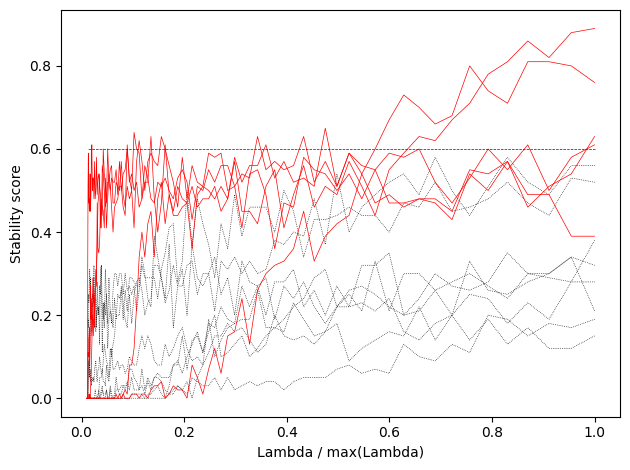

In [ ]:
fig, ax = plot_stability_path(result)
fig.show()



In [ ]:
selected_variables = result.get_support(indices=True)
selected_scores = result.stability_scores_.max(axis=1)
print(selected_variables)
print('Selected variables are:')
print('-----------------------')

for idx, (variable, score) in enumerate(zip(selected_variables, selected_scores[selected_variables])):
    print('Variable %d: [%d], score %.3f' % (idx + 1, variable, score))

[ 0  1  5  7 11]
Selected variables are:
-----------------------
Variable 1: [0], score 0.640
Variable 2: [1], score 0.630
Variable 3: [5], score 0.630
Variable 4: [7], score 0.890
Variable 5: [11], score 0.810


In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,81.0,0.02,177.630005,4.90,0.06,16.940001,1009.0,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,75.0,0.00,146.940002,2.32,0.02,10.660000,1016.0,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,78.0,0.00,181.080002,2.83,0.00,12.820000,1019.0,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,76.0,0.00,181.639999,2.57,0.06,10.360000,1018.0,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,78.0,0.00,181.229996,1.93,0.02,11.320000,1016.0,0.07,51.209999


In [ ]:
X = X[X.columns[[0,1,5,7,11]]]

In [ ]:
X

,2m T avg (F),2m T min (F),2m Rain tot (in),10m Wind avg (mph),ET (in)
Period,,,,,
2013-10-23,64.540001,49.500000,0.02,4.90,0.08
2013-10-24,55.810001,46.709999,0.00,2.32,0.10
2013-10-25,57.630001,44.169998,0.00,2.83,0.08
2013-10-26,55.540001,43.029999,0.00,2.57,0.07
2013-10-27,56.080002,41.130001,0.00,1.93,0.07
...,...,...,...,...,...
2023-07-04,82.290001,72.629997,0.04,3.02,0.21
2023-07-05,83.589996,73.239998,0.00,3.21,0.19
2023-07-06,82.610001,75.489998,0.00,3.62,0.18


In [ ]:
y

Period
2013-10-23    75.059998
2013-10-24    70.900002
2013-10-25    69.709999
2013-10-26    69.169998
2013-10-27    68.750000
                ...    
2023-07-04    82.889999
2023-07-05    82.559998
2023-07-06    82.510002
2023-07-07    81.790001
2023-07-08    79.879997
Name: Tsoil avg-10cm  (F), Length: 3542, dtype: float32

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_scaled

array([[-0.4032232 , -0.7458762 , -0.2933927 ,  0.41611642, -0.62721187],
       [-1.2142386 , -0.9646546 , -0.33826303, -1.0666183 , -0.18470922],
       [-1.045161  , -1.1638292 , -0.33826303, -0.7735196 , -0.62721187],
       ...,
       [ 1.2754767 ,  1.292134  , -0.33826303, -0.319504  ,  1.5853014 ],
       [ 1.072955  ,  1.0984485 ,  7.626221  ,  0.20347627,  1.3640499 ],
       [ 1.1612096 ,  1.1015851 , -0.31582788,  0.24945249,  2.027804  ]],
      dtype=float32)

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X_scaled[:split_size], y_scaled[:split_size]
X_test, y_test = X_scaled[split_size:], y_scaled[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2833, 2833, 709, 709)

MLP with Adam

In [ ]:
wb = Workbook()

In [ ]:
ws1 = wb.create_sheet("Model_Results")
ws1['A2']='Stability Selection'
ws1['A3']='UMAP'
ws1['A4']='Entropy Theory'
ws1['B1']='Best Hidden Size'
ws1['C1']='MLP_train_RMSE'
ws1['D1']='MLP_test_RMSE'
ws1['E1']='Best Hidden Size'
ws1['F1']='MLP+Adabelief_train_RMSE'
ws1['G1']='MLP+Adabelief_test_RMSE'
ws1['H1']='Best Hidden Size'
ws1['I1']='MLP+RangerAdabelief_train_RMSE'
ws1['J1']='MLP+RangerAdabelief_test_RMSE'
ws1['K1']='Best Hidden Size'
ws1['L1']='LSTM_train_RMSE'
ws1['M1']='LSTM_test_RMSE'
ws1['N1']='Best Hidden Size'
ws1['O1']='N-Beats_train_RMSE'
ws1['P1']='N-Beats_test_RMSE'
ws2 = wb.create_sheet("StabilitySelection_MLP")
ws2['A1']="Original Outputs"
ws2['B1']="Predicted Outputs"
ws3 = wb.create_sheet("StabilitySelection_MLP_AdaBelief")
ws3['A1']="Original Outputs"
ws3['B1']="Predicted Outputs"
ws4 = wb.create_sheet("StabilitySelection_MLP_RangerAdaBelief")
ws4['A1']="Original Outputs"
ws4['B1']="Predicted Outputs"
ws5 = wb.create_sheet("StabilitySelection_LSTM")
ws5['A1']="Original Outputs"
ws5['B1']="Predicted Outputs"
ws6 = wb.create_sheet("StabilitySelection_N_Beats")
ws6['A1']="Original Outputs"
ws6['B1']="Predicted Outputs"
ws7 = wb.create_sheet("UMAP_MLP")
ws7['A1']="Original Outputs"
ws7['B1']="Predicted Outputs"
ws8 = wb.create_sheet("UMAP_MLP_AdaBelief")
ws8['A1']="Original Outputs"
ws8['B1']="Predicted Outputs"
ws9 = wb.create_sheet("UMAP_MLP_RangerAdaBelief")
ws9['A1']="Original Outputs"
ws9['B1']="Predicted Outputs"
ws10 = wb.create_sheet("UMAP_LSTM")
ws10['A1']="Original Outputs"
ws10['B1']="Predicted Outputs"
ws11 = wb.create_sheet("UMAP_N_Beats")
ws11['A1']="Original Outputs"
ws11['B1']="Predicted Outputs"
ws12 = wb.create_sheet("EntropyTheory_MLP")
ws12['A1']="Original Outputs"
ws12['B1']="Predicted Outputs"
ws13 = wb.create_sheet("EntropyTheory_MLP_AdaBelief")
ws13['A1']="Original Outputs"
ws13['B1']="Predicted Outputs"
ws14 = wb.create_sheet("EntropyTheory_MLP_RangerAdaBelief")
ws14['A1']="Original Outputs"
ws14['B1']="Predicted Outputs"
ws15 = wb.create_sheet("EntropyTheory_LSTM")
ws15['A1']="Original Outputs"
ws15['B1']="Predicted Outputs"
ws16 = wb.create_sheet("EntropyTheory_N_Beats")
ws16['A1']="Original Outputs"
ws16['B1']="Predicted Outputs"
wb.save(filename = 'Results.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
best_test_rmse=0.999999
# Step 2: Create and train the MLP model
# Modify the hyperparameters to adjust the model architecture and training process
for roh in range(1,21):
  mlp = MLPRegressor(hidden_layer_sizes=(roh), activation='relu', solver='adam', max_iter=100, random_state=42)
  mlp.fit(X_train, y_train)
  train_predictions = mlp.predict(X_train)
  test_predictions = mlp.predict(X_test)
  train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
  print(roh)
  print("Training RMSE:", train_rmse)
  print("Testing RMSE:", test_rmse)
  if test_rmse < best_test_rmse:
    best_test_rmse=test_rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=test_predictions
ws1['B2']=best_hidden_size
ws1['C2']=best_train_rmse
ws1['D2']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws2['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws2['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
Training RMSE: 0.54340184
Testing RMSE: 0.60235626


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
Training RMSE: 0.5815139
Testing RMSE: 0.551103
3
Training RMSE: 0.34024987
Testing RMSE: 0.3937912


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4
Training RMSE: 0.3254401
Testing RMSE: 0.3706294


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
Training RMSE: 0.3474331
Testing RMSE: 0.41365212


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6
Training RMSE: 0.3368088
Testing RMSE: 0.36851358


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7
Training RMSE: 0.3408979
Testing RMSE: 0.39130992
8
Training RMSE: 0.3244319
Testing RMSE: 0.37596712


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9
Training RMSE: 0.33176926
Testing RMSE: 0.39290458


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
Training RMSE: 0.32070556
Testing RMSE: 0.36919603


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11
Training RMSE: 0.32388774
Testing RMSE: 0.37274364


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12
Training RMSE: 0.32327318
Testing RMSE: 0.3752936


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13
Training RMSE: 0.32228476
Testing RMSE: 0.37602243


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14
Training RMSE: 0.3256295
Testing RMSE: 0.37187096


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15
Training RMSE: 0.32621545
Testing RMSE: 0.369609


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16
Training RMSE: 0.3202198
Testing RMSE: 0.37418678


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17
Training RMSE: 0.3198931
Testing RMSE: 0.3712985


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18
Training RMSE: 0.32604635
Testing RMSE: 0.3844551


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19
Training RMSE: 0.31891823
Testing RMSE: 0.37245086


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
Training RMSE: 0.32299182
Testing RMSE: 0.37818035


MLP with Adabelief

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_test_rmse=1
for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = AdaBelief(model.parameters(),lr=0.01, betas = (0.9,0.999), eps=1e-8, weight_decouple = True, rectify = False)


  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()
      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()



  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()
  train_predictions=[]
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          train_predictions.extend(output.numpy())
  train_predictions = np.array(train_predictions)
  if roh==1:
    labels_train = labels_train.numpy()
  else:
    labels_train = labels_train
  # Load the state of the best model
  train_rmse = np.sqrt(mean_squared_error(labels_train, train_predictions))

  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print("train RMSE",train_rmse)
  print(f"Test RMSE: {rmse}")
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=predictions
ws1['E2']=best_hidden_size
ws1['F2']=best_train_rmse
ws1['G2']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws3['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws3['B{}'.format(i+2)] = float(prediction)

wb.save(filename = 'Results.xlsx')

hello
<generator object Module.parameters at 0x7876908198c0>
Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Weight decoupling enabled in AdaBelief
1
train RMSE 1.38

MLP with RangerAdaBelief

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_test_rmse=1
for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = RangerAdaBelief(model.parameters(), lr=1e-2, eps=1e-12, betas=(0.9,0.999),weight_decouple = False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()

  train_predictions=[]
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          train_predictions.extend(output.numpy())
  train_predictions = np.array(train_predictions)
  if roh==1:
    labels_train = labels_train.numpy()
  else:
    labels_train = labels_train
  # Load the state of the best model
  train_rmse = np.sqrt(mean_squared_error(labels_train, train_predictions))

  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=predictions

ws1['H2']=best_hidden_size
ws1['I2']=best_train_rmse
ws1['J2']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws4['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws4['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

hello
<generator object Module.parameters at 0x78769070c970>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
1
Test RMSE: 0.8254187107086182
train RMSE: 1.3070633
hello
<generator object Module.parameters at 0x78769069b370>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
2
Test RMSE: 0.38015732169151306
train RMSE: 1.4089181
hello
<generator object Module.parameters at 0x78769070cb30>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
3
Test RMSE: 0.3638211488723755
train RMSE: 1.3741174
hello
<generator object Module.parameters at 0x78769070cb30>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
4
Test RMSE: 0.3803347051143646
train RMSE: 1.4538323
hello
<generator object Module.parameters at 0x78769070cb30>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied 

LSTM

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(X_train)
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=12, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model_4.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Original shape: (2833, 5)
Expanded shape: (2833, 1, 5)
Original values with expanded shape:
 [[[-0.4032232  -0.7458762  -0.2933927   0.41611642 -0.62721187]]

 [[-1.2142386  -0.9646546  -0.33826303 -1.0666183  -0.18470922]]

 [[-1.045161   -1.1638292  -0.33826303 -0.7735196  -0.62721187]]

 ...

 [[ 0.8657881   1.2097985   5.023742   -0.45168564 -0.18470922]]

 [[ 0.84627926  1.1651019   1.277069   -0.54938525  0.2577933 ]]

 [[ 0.99027425  1.1690223  -0.31582788 -0.681567    1.3640499 ]]]


In [ ]:
model_4.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.1353 - root_mean_squared_error: 0.3678


[0.13527968525886536, 0.3678038716316223]

In [ ]:
best_test_rmse=1
for roh in range(1,21):
  tf.random.set_seed(42)

  # Let's build an LSTM model with the Functional API
  inputs = layers.Input(shape=(5))
  x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
  # print(x.shape)
  # x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
  x = layers.LSTM(roh, activation="relu")(x) # using the tanh loss function results in a massive error
  # print(x.shape)


  output = layers.Dense(HORIZON)(x)
  model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

  # Compile model
  model_5.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
  model_5.fit(X_train,
              y_train,
              epochs=100,
              verbose=0,
              batch_size=128,
              validation_data=(X_test, y_test),
              callbacks=[create_model_checkpoint(model_name=model_5.name)])
  print(roh)
  rmse=model_5.evaluate(X_test, y_test)
  rmse=rmse[1]
  print("test rmse",rmse)
  train_rmse=model_5.evaluate(X_train, y_train)
  train_rmse=train_rmse[1]
  print("train rmse",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=model_5.predict(X_test)

ws1['K2']=best_hidden_size
ws1['L2']=best_train_rmse
ws1['M2']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws5['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws5['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

1
23/23 [==============================] - 0s 2ms/step - loss: 0.1674 - root_mean_squared_error: 0.4092
test rmse 0.4091818034648895
89/89 [==============================] - 0s 2ms/step - loss: 0.1341 - root_mean_squared_error: 0.3661
train rmse 0.3661395013332367
23/23 [==============================] - 0s 2ms/step


2
23/23 [==============================] - 0s 2ms/step - loss: 0.1665 - root_mean_squared_error: 0.4080
test rmse 0.40804967284202576
89/89 [==============================] - 0s 2ms/step - loss: 0.1235 - root_mean_squared_error: 0.3514
train rmse 0.3513810336589813
23/23 [==============================] - 0s 2ms/step


3
23/23 [==============================] - 0s 2ms/step - loss: 0.1393 - root_mean_squared_error: 0.3732
test rmse 0.3731881380081177
89/89 [==============================] - 0s 3ms/step - loss: 0.1015 - root_mean_squared_error: 0.3185
train rmse 0.31854018568992615
23/23 [==============================] - 0s 2ms/step


4
23/23 [==============================] - 0s 2ms/step - loss: 0.1341 - root_mean_squared_error: 0.3662
test rmse 0.3661622405052185
89/89 [==============================] - 0s 2ms/step - loss: 0.1019 - root_mean_squared_error: 0.3192
train rmse 0.31921544671058655
23/23 [==============================] - 0s 2ms/step


5
23/23 [==============================] - 0s 2ms/step - loss: 0.1366 - root_mean_squared_error: 0.3695
test rmse 0.3695487678050995
89/89 [==============================] - 0s 2ms/step - loss: 0.1051 - root_mean_squared_error: 0.3243
train rmse 0.32425254583358765


6
23/23 [==============================] - 0s 2ms/step - loss: 0.1359 - root_mean_squared_error: 0.3686
test rmse 0.36861652135849
89/89 [==============================] - 0s 2ms/step - loss: 0.1007 - root_mean_squared_error: 0.3173
train rmse 0.3172840178012848


7
23/23 [==============================] - 0s 2ms/step - loss: 0.1342 - root_mean_squared_error: 0.3663
test rmse 0.36629506945610046
89/89 [==============================] - 0s 2ms/step - loss: 0.1006 - root_mean_squared_error: 0.3171
train rmse 0.31712624430656433


8
23/23 [==============================] - 0s 2ms/step - loss: 0.1344 - root_mean_squared_error: 0.3666
test rmse 0.3666192889213562
89/89 [==============================] - 0s 2ms/step - loss: 0.1001 - root_mean_squared_error: 0.3165
train rmse 0.3164522349834442


9
23/23 [==============================] - 0s 4ms/step - loss: 0.1352 - root_mean_squared_error: 0.3677
test rmse 0.3676794469356537
89/89 [==============================] - 0s 3ms/step - loss: 0.1008 - root_mean_squared_error: 0.3175
train rmse 0.31751549243927


10
23/23 [==============================] - 0s 3ms/step - loss: 0.1352 - root_mean_squared_error: 0.3677
test rmse 0.367652952671051
89/89 [==============================] - 0s 3ms/step - loss: 0.0998 - root_mean_squared_error: 0.3160
train rmse 0.315951406955719


11
23/23 [==============================] - 0s 2ms/step - loss: 0.1338 - root_mean_squared_error: 0.3658
test rmse 0.3657640516757965
89/89 [==============================] - 0s 2ms/step - loss: 0.1011 - root_mean_squared_error: 0.3180
train rmse 0.31800758838653564
23/23 [==============================] - 0s 2ms/step


12
23/23 [==============================] - 0s 2ms/step - loss: 0.1340 - root_mean_squared_error: 0.3660
test rmse 0.3660247325897217
89/89 [==============================] - 0s 2ms/step - loss: 0.1004 - root_mean_squared_error: 0.3169
train rmse 0.316851943731308


13
23/23 [==============================] - 0s 2ms/step - loss: 0.1356 - root_mean_squared_error: 0.3682
test rmse 0.36818987131118774
89/89 [==============================] - 0s 2ms/step - loss: 0.1003 - root_mean_squared_error: 0.3167
train rmse 0.3167181611061096


14
23/23 [==============================] - 0s 2ms/step - loss: 0.1338 - root_mean_squared_error: 0.3658
test rmse 0.36581844091415405
89/89 [==============================] - 0s 2ms/step - loss: 0.1000 - root_mean_squared_error: 0.3162
train rmse 0.3162004351615906


15
23/23 [==============================] - 0s 2ms/step - loss: 0.1354 - root_mean_squared_error: 0.3680
test rmse 0.3680233955383301
89/89 [==============================] - 0s 2ms/step - loss: 0.0999 - root_mean_squared_error: 0.3161
train rmse 0.3160739243030548


16
23/23 [==============================] - 0s 2ms/step - loss: 0.1328 - root_mean_squared_error: 0.3644
test rmse 0.3643898665904999
89/89 [==============================] - 0s 2ms/step - loss: 0.0993 - root_mean_squared_error: 0.3151
train rmse 0.31513527035713196
23/23 [==============================] - 0s 2ms/step


17
23/23 [==============================] - 0s 4ms/step - loss: 0.1311 - root_mean_squared_error: 0.3621
test rmse 0.3621216416358948
89/89 [==============================] - 0s 2ms/step - loss: 0.0987 - root_mean_squared_error: 0.3142
train rmse 0.31416019797325134
23/23 [==============================] - 0s 2ms/step


18
23/23 [==============================] - 0s 2ms/step - loss: 0.1339 - root_mean_squared_error: 0.3659
test rmse 0.36590775847435
89/89 [==============================] - 0s 2ms/step - loss: 0.0994 - root_mean_squared_error: 0.3152
train rmse 0.31520357728004456


19
23/23 [==============================] - 0s 3ms/step - loss: 0.1316 - root_mean_squared_error: 0.3628
test rmse 0.36281654238700867
89/89 [==============================] - 0s 3ms/step - loss: 0.0985 - root_mean_squared_error: 0.3139
train rmse 0.3139232397079468


20
23/23 [==============================] - 0s 2ms/step - loss: 0.1343 - root_mean_squared_error: 0.3664
test rmse 0.36643868684768677
89/89 [==============================] - 0s 2ms/step - loss: 0.0996 - root_mean_squared_error: 0.3155
train rmse 0.3155164122581482


N-Beats

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [ ]:
best_test_rmse=1
for roh in range(1,21):
  # Values from N-BEATS paper Figure 1 and Table 18/Appendix D
  N_EPOCHS = 100 # called "Iterations" in Table 18
  N_NEURONS = roh # called "Width" in Table 18
  N_LAYERS = 2
  N_STACKS = 1
  INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
  THETA_SIZE = INPUT_SIZE + HORIZON

  INPUT_SIZE, THETA_SIZE


  # %%time

  tf.random.set_seed(42)

  # 1. Setup N-BEATS Block layer
  nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

  # 2. Create input to stacks
  stack_input = layers.Input(shape=(5), name="stack_input")

  # 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
  backcast, forecast = nbeats_block_layer(stack_input)
  # Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
  residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

  # 4. Create stacks of blocks
  for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

  # 7. Put the stack model together
  model_6 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_6_N-BEATS")

  # 8. Compile with MAE loss and Adam optimizer
  model_6.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
  model_6.fit(train_dataset,
              epochs=N_EPOCHS,
              validation_data=test_dataset,
              verbose=0, # prevent large amounts of training outputs
              # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
  print(roh)
  # Evaluate N-BEATS model on the test dataset
  rmse=model_6.evaluate(test_dataset)
  rmse=rmse[1]
  print("test RMSE:",rmse)
  train_rmse=model_6.evaluate(train_dataset)
  train_rmse=train_rmse[1]
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=model_6.predict(X_test)

ws1['N2']=best_hidden_size
ws1['O2']=best_train_rmse
ws1['P2']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws6['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws6['B{}'.format(i+2)] = float(prediction)

wb.save(filename = 'Results.xlsx')

1
1/1 [==============================] - 0s 13ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723
test RMSE: 0.6723209619522095
3/3 [==============================] - 0s 6ms/step - loss: 0.3876 - root_mean_squared_error: 0.6225
train RMSE: 0.6225499510765076
23/23 [==============================] - 0s 1ms/step
2
1/1 [==============================] - 0s 18ms/step - loss: 0.9082 - root_mean_squared_error: 0.9530
test RMSE: 0.9530202746391296
3/3 [==============================] - 0s 6ms/step - loss: 1.0258 - root_mean_squared_error: 1.0128
train RMSE: 1.0128064155578613
3
1/1 [==============================] - 0s 14ms/step - loss: 0.5049 - root_mean_squared_error: 0.7106
test RMSE: 0.7105886936187744
3/3 [==============================] - 0s 7ms/step - loss: 0.4937 - root_mean_squared_error: 0.7027
train RMSE: 0.7026656270027161
4
1/1 [==============================] - 0s 12ms/step - loss: 0.2595 - root_mean_squared_error: 0.5094
test RMSE: 0.5093941688537598
3/3 [=================

# **UMAP**

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.head())


            2m T avg (F)  2m T min (F)  2m T max (F)  2m DewPt avg (F)  \
Period                                                                   
2013-10-23     64.540001     49.500000     74.879997         57.110001   
2013-10-24     55.810001     46.709999     70.519997         46.720001   
2013-10-25     57.630001     44.169998     73.709999         49.450001   
2013-10-26     55.540001     43.029999     72.099998         46.680000   
2013-10-27     56.080002     41.130001     74.440002         47.099998   

            RelHum avg 2m  (pct)  2m Rain tot (in)  SolRad avg2m  (w/m^2)  \
Period                                                                      
2013-10-23                  81.0              0.02             177.630005   
2013-10-24                  75.0              0.00             146.940002   
2013-10-25                  78.0              0.00             181.080002   
2013-10-26                  76.0              0.00             181.639999   
2013-10-27         

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
reducer=umap.UMAP(n_components=3,min_dist=0.3)

In [ ]:
embedding=reducer.fit_transform(X_scaled)

In [ ]:
embedding

array([[ 5.2777395,  7.064147 ,  7.686953 ],
       [ 3.760841 ,  7.037383 ,  8.778119 ],
       [ 3.9987442,  7.0571957,  8.612235 ],
       ...,
       [10.715552 ,  8.453825 ,  5.001571 ],
       [ 8.891207 ,  3.8618762,  4.413666 ],
       [ 9.573575 ,  8.110842 ,  4.451232 ]], dtype=float32)

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = embedding[:split_size], y_scaled[:split_size]
X_test, y_test = embedding[split_size:], y_scaled[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2833, 2833, 709, 709)

In [ ]:
print(X_train,X_test,y_train,y_test)

[[ 5.2777395  7.064147   7.686953 ]
 [ 3.760841   7.037383   8.778119 ]
 [ 3.9987442  7.0571957  8.612235 ]
 ...
 [ 8.403631   3.6383753  4.625739 ]
 [ 9.366631   5.143866   4.5672317]
 [10.334435   7.454608   5.063755 ]] [[10.103461   8.38369    5.13876  ]
 [ 9.672463   8.1154785  4.9196014]
 [ 9.357774   5.989756   4.640501 ]
 ...
 [10.715552   8.453825   5.001571 ]
 [ 8.891207   3.8618762  4.413666 ]
 [ 9.573575   8.110842   4.451232 ]] [[ 0.3417217 ]
 [-0.11407956]
 [-0.24446538]
 ...
 [ 0.91366524]
 [ 0.84135103]
 [ 0.9563966 ]] [[ 1.1284178 ]
 [ 1.151427  ]
 [ 1.0758258 ]
 [ 0.98159754]
 [ 0.7493137 ]
 [ 0.7646531 ]
 [ 0.69452983]
 [ 0.66166   ]
 [ 0.7493137 ]
 [ 0.90709144]
 [ 1.0823996 ]
 [ 1.1459491 ]
 [ 1.098835  ]
 [ 1.0999309 ]
 [ 1.073634  ]
 [ 0.9673532 ]
 [ 0.9388662 ]
 [ 0.8807955 ]
 [ 0.83039355]
 [ 0.9750229 ]
 [ 1.0834955 ]
 [ 1.1119826 ]
 [ 1.1426622 ]
 [ 1.0484339 ]
 [ 0.98707545]
 [ 0.9377703 ]
 [ 0.78985405]
 [ 0.7701318 ]
 [ 0.82710665]
 [ 0.89613485]
 [ 1.01008

MLP with Adam

In [ ]:
best_test_rmse=1
# Step 2: Create and train the MLP model
# Modify the hyperparameters to adjust the model architecture and training process
for roh in range(1,21):
  mlp = MLPRegressor(hidden_layer_sizes=(roh), activation='relu', solver='adam', max_iter=100, random_state=0)
  mlp.fit(X_train, y_train)
  train_predictions = mlp.predict(X_train)
  test_predictions = mlp.predict(X_test)
  train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
  print(roh)
  print("Training RMSE:", train_rmse)
  print("Testing RMSE:", test_rmse)
  if test_rmse < best_test_rmse:
    best_test_rmse=test_rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=test_predictions
ws1['B3']=best_hidden_size
ws1['C3']=best_train_rmse
ws1['D3']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws7['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws7['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
Training RMSE: 0.55644906
Testing RMSE: 0.5288904


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
Training RMSE: 0.43633527
Testing RMSE: 0.4652451


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3
Training RMSE: 0.44123632
Testing RMSE: 0.46373972


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4
Training RMSE: 0.48568702
Testing RMSE: 0.5229585


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
Training RMSE: 0.64118606
Testing RMSE: 0.6422695


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6
Training RMSE: 0.42297423
Testing RMSE: 0.4571601


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7
Training RMSE: 0.44572842
Testing RMSE: 0.4711104


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8
Training RMSE: 0.43935478
Testing RMSE: 0.46240047
9
Training RMSE: 0.4693641
Testing RMSE: 0.5127286


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
Training RMSE: 0.7004936
Testing RMSE: 0.6986103


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11
Training RMSE: 0.43093145
Testing RMSE: 0.4523169


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12
Training RMSE: 0.46465757
Testing RMSE: 0.4973391


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13
Training RMSE: 0.5037193
Testing RMSE: 0.552183


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14
Training RMSE: 0.5083541
Testing RMSE: 0.53421885
15
Training RMSE: 0.4238452
Testing RMSE: 0.45313814


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16
Training RMSE: 0.44479793
Testing RMSE: 0.48885083


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17
Training RMSE: 0.43384168
Testing RMSE: 0.43555406


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18
Training RMSE: 0.4299016
Testing RMSE: 0.4854492


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19
Training RMSE: 0.43296534
Testing RMSE: 0.4600932
20
Training RMSE: 0.44303742
Testing RMSE: 0.45890936


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with AdaBelief

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_test_rmse=1
for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = AdaBelief(model.parameters(),lr=0.01, betas = (0.9,0.999), eps=1e-8, weight_decouple = True, rectify = False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()

  train_predictions=[]
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          train_predictions.extend(output.numpy())
  train_predictions = np.array(train_predictions)
  if roh==1:
    labels_train = labels_train.numpy()
  else:
    labels_train = labels_train
  # Load the state of the best model
  train_rmse = np.sqrt(mean_squared_error(labels_train, train_predictions))

  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=predictions
ws1['E3']=best_hidden_size
ws1['F3']=best_train_rmse
ws1['G3']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws8['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws8['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

hello
<generator object Module.parameters at 0x78767efd85f0>
Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Weight decoupling enabled in AdaBelief
1
Test RMSE: 0.42

MLP with RangerAdaBelief

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_test_rmse=1
for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = RangerAdaBelief(model.parameters(), lr=1e-2, eps=1e-12, betas=(0.9,0.999),weight_decouple = False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()

  train_predictions=[]
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          train_predictions.extend(output.numpy())
  train_predictions = np.array(train_predictions)
  if roh==1:
    labels_train = labels_train.numpy()
  else:
    labels_train = labels_train
  # Load the state of the best model
  train_rmse = np.sqrt(mean_squared_error(labels_train, train_predictions))

  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=predictions

ws1['H3']=best_hidden_size
ws1['I3']=best_train_rmse
ws1['J3']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws9['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws9['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

hello
<generator object Module.parameters at 0x78767aee9150>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
1
Test RMSE: 0.561600387096405
train RMSE: 1.3785999
hello
<generator object Module.parameters at 0x78767aee94d0>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
2
Test RMSE: 0.504366934299469
train RMSE: 1.3783522
hello
<generator object Module.parameters at 0x78767aee92a0>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
3
Test RMSE: 0.43661388754844666
train RMSE: 1.3496143
hello
<generator object Module.parameters at 0x78767aee95b0>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
4
Test RMSE: 0.5012459754943848
train RMSE: 1.3645748
hello
<generator object Module.parameters at 0x78767aee93f0>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to

LSTM

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(X_train)
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=12, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_7_conv1D")

# Compile model
model_7.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model_7.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_7.name)])

Original shape: (2833, 3)
Expanded shape: (2833, 1, 3)
Original values with expanded shape:
 [[[ 5.2777395  7.064147   7.686953 ]]

 [[ 3.760841   7.037383   8.778119 ]]

 [[ 3.9987442  7.0571957  8.612235 ]]

 ...

 [[ 8.403631   3.6383753  4.625739 ]]

 [[ 9.366631   5.143866   4.5672317]]

 [[10.334435   7.454608   5.063755 ]]]


In [ ]:
model_7.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 0.2135 - root_mean_squared_error: 0.4621


[0.21353715658187866, 0.4621008038520813]

In [ ]:
best_test_rmse=1
for roh in range(1,21):
  tf.random.set_seed(42)

  # Let's build an LSTM model with the Functional API
  inputs = layers.Input(shape=(3))
  x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
  # print(x.shape)
  # x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
  x = layers.LSTM(roh, activation="relu")(x) # using the tanh loss function results in a massive error
  # print(x.shape)


  output = layers.Dense(HORIZON)(x)
  model_8 = tf.keras.Model(inputs=inputs, outputs=output, name="model_8_lstm")

  # Compile model
  model_8.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
  model_8.fit(X_train,
              y_train,
              epochs=100,
              verbose=0,
              batch_size=128,
              validation_data=(X_test, y_test),
              callbacks=[create_model_checkpoint(model_name=model_8.name)])
  print(roh)
  rmse=model_8.evaluate(X_test, y_test)
  rmse=rmse[1]
  print("test rmse",rmse)
  train_rmse=model_8.evaluate(X_train, y_train)
  train_rmse=train_rmse[1]
  print("train rmse",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=model_8.predict(X_test)

ws1['K3']=best_hidden_size
ws1['L3']=best_train_rmse
ws1['M3']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws10['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws10['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

1
23/23 [==============================] - 0s 2ms/step - loss: 0.2815 - root_mean_squared_error: 0.5306
test rmse 0.5305757522583008
89/89 [==============================] - 0s 2ms/step - loss: 0.2655 - root_mean_squared_error: 0.5152
train rmse 0.5152348279953003
23/23 [==============================] - 0s 2ms/step


2
23/23 [==============================] - 0s 2ms/step - loss: 0.2463 - root_mean_squared_error: 0.4963
test rmse 0.49633485078811646
89/89 [==============================] - 0s 2ms/step - loss: 0.2257 - root_mean_squared_error: 0.4750
train rmse 0.4750312864780426
23/23 [==============================] - 0s 2ms/step


3
23/23 [==============================] - 0s 2ms/step - loss: 0.2090 - root_mean_squared_error: 0.4572
test rmse 0.4572189748287201
89/89 [==============================] - 0s 2ms/step - loss: 0.1682 - root_mean_squared_error: 0.4101
train rmse 0.4100867509841919
23/23 [==============================] - 0s 2ms/step


4
23/23 [==============================] - 0s 2ms/step - loss: 0.2153 - root_mean_squared_error: 0.4640
test rmse 0.46403995156288147
89/89 [==============================] - 0s 2ms/step - loss: 0.1698 - root_mean_squared_error: 0.4121
train rmse 0.41212552785873413


5
23/23 [==============================] - 0s 4ms/step - loss: 0.2109 - root_mean_squared_error: 0.4593
test rmse 0.4592660367488861
89/89 [==============================] - 0s 4ms/step - loss: 0.1845 - root_mean_squared_error: 0.4295
train rmse 0.4295089840888977


6
23/23 [==============================] - 0s 2ms/step - loss: 0.2112 - root_mean_squared_error: 0.4596
test rmse 0.45960018038749695
89/89 [==============================] - 0s 2ms/step - loss: 0.1794 - root_mean_squared_error: 0.4235
train rmse 0.4235471189022064


7
23/23 [==============================] - 0s 2ms/step - loss: 0.2031 - root_mean_squared_error: 0.4506
test rmse 0.45063862204551697
89/89 [==============================] - 0s 2ms/step - loss: 0.1958 - root_mean_squared_error: 0.4425
train rmse 0.442514032125473
23/23 [==============================] - 0s 2ms/step


8
23/23 [==============================] - 0s 2ms/step - loss: 0.2079 - root_mean_squared_error: 0.4560
test rmse 0.4559720754623413
89/89 [==============================] - 0s 2ms/step - loss: 0.1784 - root_mean_squared_error: 0.4224
train rmse 0.42235246300697327


9
23/23 [==============================] - 0s 2ms/step - loss: 0.2242 - root_mean_squared_error: 0.4735
test rmse 0.473471999168396
89/89 [==============================] - 0s 2ms/step - loss: 0.1957 - root_mean_squared_error: 0.4424
train rmse 0.4423941969871521


10
23/23 [==============================] - 0s 2ms/step - loss: 0.2125 - root_mean_squared_error: 0.4610
test rmse 0.46098729968070984
89/89 [==============================] - 0s 2ms/step - loss: 0.1899 - root_mean_squared_error: 0.4358
train rmse 0.435807466506958


11
23/23 [==============================] - 0s 2ms/step - loss: 0.2051 - root_mean_squared_error: 0.4529
test rmse 0.4528919756412506
89/89 [==============================] - 0s 2ms/step - loss: 0.1688 - root_mean_squared_error: 0.4108
train rmse 0.4108318090438843


12
23/23 [==============================] - 0s 2ms/step - loss: 0.2084 - root_mean_squared_error: 0.4565
test rmse 0.45650869607925415
89/89 [==============================] - 0s 2ms/step - loss: 0.1730 - root_mean_squared_error: 0.4160
train rmse 0.4159916639328003


13
23/23 [==============================] - 0s 2ms/step - loss: 0.2104 - root_mean_squared_error: 0.4587
test rmse 0.4587171971797943
89/89 [==============================] - 0s 2ms/step - loss: 0.1699 - root_mean_squared_error: 0.4121
train rmse 0.41214194893836975


14
23/23 [==============================] - 0s 3ms/step - loss: 0.2008 - root_mean_squared_error: 0.4481
test rmse 0.4480630159378052
89/89 [==============================] - 0s 3ms/step - loss: 0.1640 - root_mean_squared_error: 0.4050
train rmse 0.40501710772514343
23/23 [==============================] - 0s 2ms/step


15
23/23 [==============================] - 0s 2ms/step - loss: 0.2064 - root_mean_squared_error: 0.4543
test rmse 0.45428571105003357
89/89 [==============================] - 0s 2ms/step - loss: 0.1722 - root_mean_squared_error: 0.4150
train rmse 0.41501614451408386


16
23/23 [==============================] - 0s 2ms/step - loss: 0.2033 - root_mean_squared_error: 0.4509
test rmse 0.4508562684059143
89/89 [==============================] - 0s 2ms/step - loss: 0.1696 - root_mean_squared_error: 0.4118
train rmse 0.4118330776691437


17
23/23 [==============================] - 0s 2ms/step - loss: 0.2010 - root_mean_squared_error: 0.4483
test rmse 0.4483252167701721
89/89 [==============================] - 0s 2ms/step - loss: 0.1706 - root_mean_squared_error: 0.4131
train rmse 0.41305768489837646


18
23/23 [==============================] - 0s 2ms/step - loss: 0.2052 - root_mean_squared_error: 0.4530
test rmse 0.4530199468135834
89/89 [==============================] - 0s 2ms/step - loss: 0.1699 - root_mean_squared_error: 0.4122
train rmse 0.4121972620487213


19
23/23 [==============================] - 0s 3ms/step - loss: 0.2099 - root_mean_squared_error: 0.4582
test rmse 0.45820143818855286
89/89 [==============================] - 0s 3ms/step - loss: 0.1694 - root_mean_squared_error: 0.4115
train rmse 0.41153234243392944


20
23/23 [==============================] - 0s 2ms/step - loss: 0.2031 - root_mean_squared_error: 0.4507
test rmse 0.4506945013999939
89/89 [==============================] - 0s 2ms/step - loss: 0.1705 - root_mean_squared_error: 0.4129
train rmse 0.41287368535995483


N-Beats

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [ ]:
best_test_rmse=1
for roh in range(1,21):
  # Values from N-BEATS paper Figure 1 and Table 18/Appendix D
  N_EPOCHS = 100 # called "Iterations" in Table 18
  N_NEURONS = roh # called "Width" in Table 18
  N_LAYERS = 2
  N_STACKS = 1
  INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
  THETA_SIZE = INPUT_SIZE + HORIZON

  INPUT_SIZE, THETA_SIZE


  # %%time

  tf.random.set_seed(42)

  # 1. Setup N-BEATS Block layer
  nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

  # 2. Create input to stacks
  stack_input = layers.Input(shape=(3), name="stack_input")

  # 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
  backcast, forecast = nbeats_block_layer(stack_input)
  # Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
  residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

  # 4. Create stacks of blocks
  for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

  # 7. Put the stack model together
  model_9 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_9_N-BEATS")

  # 8. Compile with MAE loss and Adam optimizer
  model_9.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
  model_9.fit(train_dataset,
              epochs=N_EPOCHS,
              validation_data=test_dataset,
              verbose=0, # prevent large amounts of training outputs
              # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
  print(roh)
  # Evaluate N-BEATS model on the test dataset
  rmse=model_9.evaluate(test_dataset)
  rmse=rmse[1]
  print("test RMSE:",rmse)
  train_rmse=model_9.evaluate(train_dataset)
  train_rmse=train_rmse[1]
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=model_9.predict(X_test)

ws1['N3']=best_hidden_size
ws1['O3']=best_train_rmse
ws1['P3']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws11['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws11['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

1
1/1 [==============================] - 0s 11ms/step - loss: 0.9082 - root_mean_squared_error: 0.9530
test RMSE: 0.9530202746391296
3/3 [==============================] - 0s 6ms/step - loss: 1.0258 - root_mean_squared_error: 1.0128
train RMSE: 1.0128064155578613
23/23 [==============================] - 0s 2ms/step
2
1/1 [==============================] - 0s 12ms/step - loss: 0.9245 - root_mean_squared_error: 0.9615
test RMSE: 0.9614877700805664
3/3 [==============================] - 0s 5ms/step - loss: 1.0314 - root_mean_squared_error: 1.0156
train RMSE: 1.0155980587005615
3
1/1 [==============================] - 0s 12ms/step - loss: 0.8915 - root_mean_squared_error: 0.9442
test RMSE: 0.9441664218902588
3/3 [==============================] - 0s 6ms/step - loss: 0.9664 - root_mean_squared_error: 0.9831
train RMSE: 0.9830785393714905
23/23 [==============================] - 0s 2ms/step
4
1/1 [==============================] - 0s 13ms/step - loss: 0.7793 - root_mean_squared_error: 0.8828

# **Stability** **Selection** with **Random** **Forest** **Regressor**

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
df

,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,,,,
2013-10-23,64.54,49.50,74.88,75.06,72.81,76.64,57.11,81.0,0.02,177.63,4.90,0.06,16.94,1009,0.08,59.97
2013-10-24,55.81,46.71,70.52,70.90,69.15,72.68,46.72,75.0,0.00,146.94,2.32,0.02,10.66,1016,0.10,50.91
2013-10-25,57.63,44.17,73.71,69.71,67.19,72.41,49.45,78.0,0.00,181.08,2.83,0.00,12.82,1019,0.08,53.06
2013-10-26,55.54,43.03,72.10,69.17,66.58,71.98,46.68,76.0,0.00,181.64,2.57,0.06,10.36,1018,0.07,50.77
2013-10-27,56.08,41.13,74.44,68.75,65.97,71.64,47.10,78.0,0.00,181.23,1.93,0.02,11.32,1016,0.07,51.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04,82.29,72.63,96.03,82.89,79.41,86.88,74.57,80.0,0.04,279.92,3.02,0.05,25.05,1015,0.21,76.66
2023-07-05,83.59,73.24,93.70,82.56,79.27,85.78,75.47,78.0,0.00,250.34,3.21,0.00,13.58,1015,0.19,77.62
2023-07-06,82.61,75.49,93.33,82.51,79.95,85.91,76.08,82.0,0.00,223.97,3.62,0.02,15.75,1013,0.18,77.80


In [ ]:
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,81.0,0.02,177.630005,4.90,0.06,16.940001,1009.0,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,75.0,0.00,146.940002,2.32,0.02,10.660000,1016.0,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,78.0,0.00,181.080002,2.83,0.00,12.820000,1019.0,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,76.0,0.00,181.639999,2.57,0.06,10.360000,1018.0,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,78.0,0.00,181.229996,1.93,0.02,11.320000,1016.0,0.07,51.209999


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import KBinsDiscretizer

y = y.to_numpy()
# Define the number of subsamples and iterations
n_subsamples = 100  # Number of subsamples
n_iterations = 10  # Number of iterations for each subsample

# Define the number of bins for discretization
n_bins = 5  # Number of bins for discretization

# Perform discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal')
y_discrete = discretizer.fit_transform(y.reshape(-1, 1)).flatten()

# Create an array to store the feature selection scores
feature_scores = np.zeros(X.shape[1])

# Stability selection loop
for _ in range(n_subsamples):
    # Generate a random subsample with replacement
    X_subsample, y_subsample = resample(X, y_discrete, replace=True)

    # Initialize an array to store the feature importances for each iteration
    iteration_scores = np.zeros(X.shape[1])

    # Random Forest feature selection
    for _ in range(n_iterations):
        model = RandomForestClassifier(n_estimators=100)
        model.fit(X_subsample, y_subsample)
        iteration_scores += model.feature_importances_

    # Accumulate the feature importances
    feature_scores += iteration_scores / n_iterations

# Calculate the average feature importances
average_scores = feature_scores / n_subsamples

# Set a threshold to determine the selected features
threshold = 0.85  # Set your desired threshold

# Select the features based on the threshold
selected_features = np.where(average_scores > threshold)[0]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: []


In [ ]:
average_scores

array([0.17154711, 0.11181347, 0.1099453 , 0.1003745 , 0.03992627,
       0.01894832, 0.06779263, 0.05106441, 0.03792909, 0.04808669,
       0.03985203, 0.0718571 , 0.13086307])

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12']

In [ ]:
forest_importances = pd.Series(average_scores, index=feature_names)

In [ ]:
forest_importances

feature 0     0.171547
feature 1     0.111813
feature 2     0.109945
feature 3     0.100375
feature 4     0.039926
feature 5     0.018948
feature 6     0.067793
feature 7     0.051064
feature 8     0.037929
feature 9     0.048087
feature 10    0.039852
feature 11    0.071857
feature 12    0.130863
dtype: float64

In [ ]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [ ]:
import matplotlib.pyplot as plt

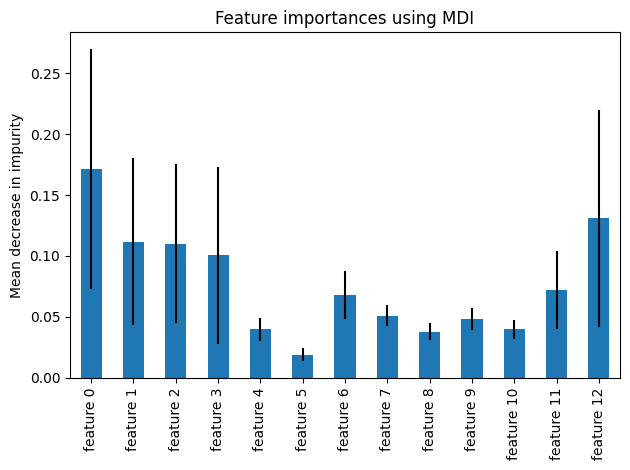

In [ ]:
import pandas as pd

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
X_test

NameError: ignored

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.inspection import permutation_importance

y = y.to_numpy()
# Define the number of subsamples and iterations
n_subsamples = 100  # Number of subsamples
n_iterations = 10  # Number of iterations for each subsample

# Define the number of bins for discretization
n_bins = 5  # Number of bins for discretization

# Perform discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal')
y_discrete = discretizer.fit_transform(y.reshape(-1, 1)).flatten()

# Create an array to store the feature selection scores
feature_scores = np.zeros(X.shape[1])

# Stability selection loop
for _ in range(n_subsamples):
    # Generate a random subsample with replacement
    X_subsample, y_subsample = resample(X, y_discrete, replace=True)

    # Initialize an array to store the feature importances for each iteration
    iteration_scores = np.zeros(X.shape[1])

    # Permutation importance calculation
    for _ in range(n_iterations):
        model1 = RandomForestClassifier(n_estimators=100)
        model1.fit(X_subsample, y_subsample)
        perm_scores = permutation_importance(model1, X_subsample, y_subsample, n_repeats=10, random_state=0)
        iteration_scores += perm_scores.importances_mean

    # Accumulate the feature importances
    feature_scores += iteration_scores / n_iterations

# Calculate the average feature importances
average_scores = feature_scores / n_subsamples


# Print the selected features
print("Selected Features:", average_scores)


Selected Features: [0.0549889  0.03326008 0.03664898 0.00773187 0.00367493 0.00129218
 0.01978213 0.00943526 0.00759876 0.00770881 0.00865655 0.04935121
 0.01863495]


In [ ]:
X.shape

(3542, 13)

In [ ]:
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,81.0,0.02,177.630005,4.90,0.06,16.940001,1009.0,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,75.0,0.00,146.940002,2.32,0.02,10.660000,1016.0,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,78.0,0.00,181.080002,2.83,0.00,12.820000,1019.0,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,76.0,0.00,181.639999,2.57,0.06,10.360000,1018.0,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,78.0,0.00,181.229996,1.93,0.02,11.320000,1016.0,0.07,51.209999


In [ ]:
X = X[X.columns[[0,1,2,3,12]]]

In [ ]:
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),2m WetBulb (F)
Period,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,51.209999


In [ ]:
y.head()

Period
2013-10-23    75.059998
2013-10-24    70.900002
2013-10-25    69.709999
2013-10-26    69.169998
2013-10-27    68.750000
Name: Tsoil avg-10cm  (F), dtype: float32

In [ ]:
print(y.shape)

(3542,)


In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X_scaled[:split_size], y_scaled[:split_size]
X_test, y_test = X_scaled[split_size:], y_scaled[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2833, 2833, 709, 709)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.hidden_layers = nn.ModuleList()
        in_features = input_size
        for hidden_size in hidden_sizes:
            self.hidden_layers.append(nn.Linear(in_features, hidden_size))
            self.hidden_layers.append(nn.ReLU())
            in_features = hidden_size
        self.output_layer = nn.Linear(in_features, output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from adabelief_pytorch import AdaBelief
from sklearn.metrics import mean_squared_error
import math
import pandas as pd
from torch.nn.init import xavier_uniform_
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
# Assuming y is your target variable

# Step 2: Feature selection
# Perform feature selection techniques such as selecting top-k features based on feature importance or domain knowledge

# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = AdaBelief(model.parameters(), lr=0.0005, eps=1e-16, betas=(0.9, 0.999), weight_decouple=False, rectify=False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()
  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")


hello
<generator object Module.parameters at 0x7f3463888350>
Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

1
Test RMSE: 0.4526866674423218
hello
<generator object 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from adabelief_pytorch import AdaBelief
from sklearn.metrics import mean_squared_error
import math
import pandas as pd
from torch.optim import SGD, Adam, RMSprop
from torch.nn.init import xavier_uniform_
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
# Assuming y is your target variable

# Step 2: Feature selection
# Perform feature selection techniques such as selecting top-k features based on feature importance or domain knowledge

# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for roh in range(15,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = Adam(model.parameters(), lr=0.00005)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()
  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")


hello
<generator object Module.parameters at 0x7f3463888740>
15
Test RMSE: 0.4048241972923279
hello
<generator object Module.parameters at 0x7f3463888740>
16
Test RMSE: 0.4117588400840759
hello
<generator object Module.parameters at 0x7f3463888740>
17
Test RMSE: 0.4026045501232147
hello
<generator object Module.parameters at 0x7f3463888740>
18
Test RMSE: 0.40728652477264404
hello
<generator object Module.parameters at 0x7f3463888740>
19
Test RMSE: 0.4008120894432068
hello
<generator object Module.parameters at 0x7f3463888740>
20
Test RMSE: 0.4134555757045746


In [ ]:
WINDOW_SIZE=1
HORIZON=1

In [ ]:

import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(X_train)
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (2833, 5)
Expanded shape: (2833, 1, 5)
Original values with expanded shape:
 [[[-0.4032232  -0.7458762  -0.53653353 -0.4248603  -0.4421828 ]]

 [[-1.2142386  -0.9646546  -0.9517654  -1.2762262  -1.2763008 ]]

 [[-1.045161   -1.1638292  -0.64796025 -1.0525275  -1.0783588 ]]

 ...

 [[ 0.8657881   1.2097985   0.6939246   1.1369331   1.0990016 ]]

 [[ 0.84627926  1.1651019   0.8205888   1.0828525   1.0502068 ]]

 [[ 0.99027425  1.1690223   1.0320144   1.0894073   1.093478  ]]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_8 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_8_conv1D")

# Compile model
model_8.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model_8.fit(X_train,
            y_train,
            batch_size=128,
            epochs=10,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_8.name)])

In [ ]:
model_8.evaluate(X_test, y_test)

23/23 [==============================] - 0s 7ms/step - loss: 0.1548 - root_mean_squared_error: 0.3935


[0.1548454761505127, 0.3935041129589081]

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(5))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)


output = layers.Dense(HORIZON)(x)
model_9 = tf.keras.Model(inputs=inputs, outputs=output, name="model_9_lstm")

# Compile model
model_9.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_9.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_9.name)])

In [ ]:
model_9.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 0.1441 - root_mean_squared_error: 0.3796


[0.14412009716033936, 0.37963151931762695]

In [ ]:

# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
print(dummy_inputs)

# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [ ]:
for roh in range(15,21):
  # Values from N-BEATS paper Figure 1 and Table 18/Appendix D
  N_EPOCHS = 100 # called "Iterations" in Table 18
  N_NEURONS = roh # called "Width" in Table 18
  N_LAYERS = 20
  N_STACKS = 10
  INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
  THETA_SIZE = INPUT_SIZE + HORIZON

  INPUT_SIZE, THETA_SIZE


  # %%time

  tf.random.set_seed(42)

  # 1. Setup N-BEATS Block layer
  nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

  # 2. Create input to stacks
  stack_input = layers.Input(shape=(5), name="stack_input")

  # 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
  backcast, forecast = nbeats_block_layer(stack_input)
  # Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
  residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

  # 4. Create stacks of blocks
  for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

  # 7. Put the stack model together
  model_11 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_11_N-BEATS")

  # 8. Compile with MAE loss and Adam optimizer
  model_11.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
  model_11.fit(train_dataset,
              epochs=N_EPOCHS,
              validation_data=test_dataset,
              verbose=0, # prevent large amounts of training outputs
              # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
  print(roh)
  # Evaluate N-BEATS model on the test dataset
  model_11.evaluate(test_dataset)

15
1/1 [==============================] - 0s 22ms/step - loss: 0.1376 - root_mean_squared_error: 0.3710
16
1/1 [==============================] - 0s 32ms/step - loss: 0.1349 - root_mean_squared_error: 0.3673
17
1/1 [==============================] - 0s 24ms/step - loss: 0.1435 - root_mean_squared_error: 0.3788
18
1/1 [==============================] - 0s 34ms/step - loss: 0.1409 - root_mean_squared_error: 0.3754


KeyboardInterrupt: ignored

# RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


# Create the estimator for RFE
estimator = LinearRegression()

# Create the RFE model
rfe_selector = RFE(estimator, n_features_to_select=5)

# Fit the RFE model
rfe_selector.fit(X, y)

# Get the mask of selected features
selected_features_mask = rfe_selector.support_

# Get the indices of selected features
selected_features_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

# Print the selected features
selected_features = [f"Feature {i}" for i in selected_features_indices]
print("Selected Features:", selected_features)


Selected Features: ['Feature 0', 'Feature 3', 'Feature 8', 'Feature 11', 'Feature 12']


# RFECV

# **Entropy** **Theory**

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
df

,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,,,,
2013-10-23,64.54,49.50,74.88,75.06,72.81,76.64,57.11,81.0,0.02,177.63,4.90,0.06,16.94,1009,0.08,59.97
2013-10-24,55.81,46.71,70.52,70.90,69.15,72.68,46.72,75.0,0.00,146.94,2.32,0.02,10.66,1016,0.10,50.91
2013-10-25,57.63,44.17,73.71,69.71,67.19,72.41,49.45,78.0,0.00,181.08,2.83,0.00,12.82,1019,0.08,53.06
2013-10-26,55.54,43.03,72.10,69.17,66.58,71.98,46.68,76.0,0.00,181.64,2.57,0.06,10.36,1018,0.07,50.77
2013-10-27,56.08,41.13,74.44,68.75,65.97,71.64,47.10,78.0,0.00,181.23,1.93,0.02,11.32,1016,0.07,51.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04,82.29,72.63,96.03,82.89,79.41,86.88,74.57,80.0,0.04,279.92,3.02,0.05,25.05,1015,0.21,76.66
2023-07-05,83.59,73.24,93.70,82.56,79.27,85.78,75.47,78.0,0.00,250.34,3.21,0.00,13.58,1015,0.19,77.62
2023-07-06,82.61,75.49,93.33,82.51,79.95,85.91,76.08,82.0,0.00,223.97,3.62,0.02,15.75,1013,0.18,77.80


In [ ]:
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,81.0,0.02,177.630005,4.90,0.06,16.940001,1009.0,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,75.0,0.00,146.940002,2.32,0.02,10.660000,1016.0,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,78.0,0.00,181.080002,2.83,0.00,12.820000,1019.0,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,76.0,0.00,181.639999,2.57,0.06,10.360000,1018.0,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,78.0,0.00,181.229996,1.93,0.02,11.320000,1016.0,0.07,51.209999


In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
sheet = wb.create_sheet("Entropy_Results")

In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy)
print("Average Joint Entropy:", average_joint_entropy)
print("Average Conditional Entropy:", average_conditional_entropy)
print("Average Mutual Information (Transinformation):", average_mutual_information)

sheet['A1'] = "average_marginal_entropy"
sheet['B1'] = "average_joint_entropy"
sheet['C1'] = "average_conditional_entropy"
sheet['D1'] = "average_mutual_information"
sheet['E1'] = "Columns"
sheet['A2'] = average_marginal_entropy
sheet['B2'] = average_joint_entropy
sheet['C2'] = average_conditional_entropy
sheet['D2'] = average_mutual_information
sheet['E2'] = "With all Columns"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.4302237186978669
Average Joint Entropy: 0.4302039952756337
Average Conditional Entropy: -1.972342223321988e-05
Average Mutual Information (Transinformation): 0.43024344212010013


# Entropy Theory - without Column 1

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
df

,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,,,,
2013-10-23,64.54,49.50,74.88,75.06,72.81,76.64,57.11,81.0,0.02,177.63,4.90,0.06,16.94,1009,0.08,59.97
2013-10-24,55.81,46.71,70.52,70.90,69.15,72.68,46.72,75.0,0.00,146.94,2.32,0.02,10.66,1016,0.10,50.91
2013-10-25,57.63,44.17,73.71,69.71,67.19,72.41,49.45,78.0,0.00,181.08,2.83,0.00,12.82,1019,0.08,53.06
2013-10-26,55.54,43.03,72.10,69.17,66.58,71.98,46.68,76.0,0.00,181.64,2.57,0.06,10.36,1018,0.07,50.77
2013-10-27,56.08,41.13,74.44,68.75,65.97,71.64,47.10,78.0,0.00,181.23,1.93,0.02,11.32,1016,0.07,51.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04,82.29,72.63,96.03,82.89,79.41,86.88,74.57,80.0,0.04,279.92,3.02,0.05,25.05,1015,0.21,76.66
2023-07-05,83.59,73.24,93.70,82.56,79.27,85.78,75.47,78.0,0.00,250.34,3.21,0.00,13.58,1015,0.19,77.62
2023-07-06,82.61,75.49,93.33,82.51,79.95,85.91,76.08,82.0,0.00,223.97,3.62,0.02,15.75,1013,0.18,77.80


In [ ]:
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
X.head()

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),BP avg (mb),ET (in),2m WetBulb (F)
Period,,,,,,,,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,81.0,0.02,177.630005,4.90,0.06,16.940001,1009.0,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,75.0,0.00,146.940002,2.32,0.02,10.660000,1016.0,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,78.0,0.00,181.080002,2.83,0.00,12.820000,1019.0,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,76.0,0.00,181.639999,2.57,0.06,10.360000,1018.0,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,78.0,0.00,181.229996,1.93,0.02,11.320000,1016.0,0.07,51.209999


In [ ]:
X.columns

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')

In [ ]:
X = X.dropna().drop(columns=["2m T avg (F)"], axis=1).astype(np.float32)

In [ ]:
X.columns

Index(['2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy1, average_joint_entropy1, average_conditional_entropy1, average_mutual_information1 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy1)
print("Average Joint Entropy:", average_joint_entropy1)
print("Average Conditional Entropy:", average_conditional_entropy1)
print("Average Mutual Information (Transinformation):", average_mutual_information1)

sheet['A3'] = average_marginal_entropy1
sheet['B3'] = average_joint_entropy1
sheet['C3'] = average_conditional_entropy1
sheet['D3'] = average_mutual_information1
sheet['E3'] = "Without Column 1"
wb.save('Results.xlsx')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.3818077804391913
Average Joint Entropy: 0.38202881368850977
Average Conditional Entropy: 0.0002210332493184919
Average Mutual Information (Transinformation): 0.3815867471898728


# Entropy Theory - without Column 2

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["2m T min (F)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy2, average_joint_entropy2, average_conditional_entropy2, average_mutual_information2 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy2)
print("Average Joint Entropy:", average_joint_entropy2)
print("Average Conditional Entropy:", average_conditional_entropy2)
print("Average Mutual Information (Transinformation):", average_mutual_information2)

sheet['A4'] = average_marginal_entropy2
sheet['B4'] = average_joint_entropy2
sheet['C4'] = average_conditional_entropy2
sheet['D4'] = average_mutual_information2
sheet['E4'] = "Without Column 2"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.40213335028245795
Average Joint Entropy: 0.40215545794222424
Average Conditional Entropy: 2.2107659766290588e-05
Average Mutual Information (Transinformation): 0.40211124262269166


# Entropy Theory - without Column 3

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["2m T max (F)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy3, average_joint_entropy3, average_conditional_entropy3, average_mutual_information3 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy3)
print("Average Joint Entropy:", average_joint_entropy3)
print("Average Conditional Entropy:", average_conditional_entropy3)
print("Average Mutual Information (Transinformation):", average_mutual_information3)
sheet['A5'] = average_marginal_entropy3
sheet['B5'] = average_joint_entropy3
sheet['C5'] = average_conditional_entropy3
sheet['D5'] = average_mutual_information3
sheet['E5'] = "Without Column 3"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.39847846397852793
Average Joint Entropy: 0.3988820612870234
Average Conditional Entropy: 0.0004035973084954847
Average Mutual Information (Transinformation): 0.39807486667003245


# Entropy Theory - without Column 4

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["2m DewPt avg (F)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', 'RelHum avg 2m  (pct)',
       '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)', '10m Wind avg (mph)',
       '10m Wind min (mph)', '10m Wind max (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy4, average_joint_entropy4, average_conditional_entropy4, average_mutual_information4 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy4)
print("Average Joint Entropy:", average_joint_entropy4)
print("Average Conditional Entropy:", average_conditional_entropy4)
print("Average Mutual Information (Transinformation):", average_mutual_information4)
sheet['A6'] = average_marginal_entropy4
sheet['B6'] = average_joint_entropy4
sheet['C6'] = average_conditional_entropy4
sheet['D6'] = average_mutual_information4
sheet['E6'] = "Without Column 4"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.40267039462548526
Average Joint Entropy: 0.4029042247646131
Average Conditional Entropy: 0.0002338301391278108
Average Mutual Information (Transinformation): 0.40243656448635745


# Entropy Theory - without Column 5

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["RelHum avg 2m  (pct)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)', '10m Wind avg (mph)',
       '10m Wind min (mph)', '10m Wind max (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy5, average_joint_entropy5, average_conditional_entropy5, average_mutual_information5 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy5)
print("Average Joint Entropy:", average_joint_entropy5)
print("Average Conditional Entropy:", average_conditional_entropy5)
print("Average Mutual Information (Transinformation):", average_mutual_information5)
sheet['A7'] = average_marginal_entropy5
sheet['B7'] = average_joint_entropy5
sheet['C7'] = average_conditional_entropy5
sheet['D7'] = average_mutual_information5
sheet['E7'] = "Without Column 5"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.4559288714949092
Average Joint Entropy: 0.45603972081096705
Average Conditional Entropy: 0.00011084931605787052
Average Mutual Information (Transinformation): 0.4558180221788513


# Entropy Theory - without Column 6

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["2m Rain tot (in)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', 'SolRad avg2m  (w/m^2)', '10m Wind avg (mph)',
       '10m Wind min (mph)', '10m Wind max (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy6, average_joint_entropy6, average_conditional_entropy6, average_mutual_information6 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy6)
print("Average Joint Entropy:", average_joint_entropy6)
print("Average Conditional Entropy:", average_conditional_entropy6)
print("Average Mutual Information (Transinformation):", average_mutual_information6)
sheet['A8'] = average_marginal_entropy6
sheet['B8'] = average_joint_entropy6
sheet['C8'] = average_conditional_entropy6
sheet['D8'] = average_mutual_information6
sheet['E8'] = "Without Column 6"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.4516785882645277
Average Joint Entropy: 0.4523120966469249
Average Conditional Entropy: 0.0006335083823971743
Average Mutual Information (Transinformation): 0.45104507988213055


# Entropy Theory - without Column 7

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["SolRad avg2m  (w/m^2)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', '10m Wind avg (mph)',
       '10m Wind min (mph)', '10m Wind max (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy7, average_joint_entropy7, average_conditional_entropy7, average_mutual_information7 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy7)
print("Average Joint Entropy:", average_joint_entropy7)
print("Average Conditional Entropy:", average_conditional_entropy7)
print("Average Mutual Information (Transinformation):", average_mutual_information7)
sheet['A9'] = average_marginal_entropy7
sheet['B9'] = average_joint_entropy7
sheet['C9'] = average_conditional_entropy7
sheet['D9'] = average_mutual_information7
sheet['E9'] = "Without Column 7"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.45189198572641204
Average Joint Entropy: 0.45139375629695383
Average Conditional Entropy: -0.0004982294294582079
Average Mutual Information (Transinformation): 0.45239021515587025


# Entropy Theory - without Column 8

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["10m Wind avg (mph)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind min (mph)', '10m Wind max (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy8, average_joint_entropy8, average_conditional_entropy8, average_mutual_information8 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy8)
print("Average Joint Entropy:", average_joint_entropy8)
print("Average Conditional Entropy:", average_conditional_entropy8)
print("Average Mutual Information (Transinformation):", average_mutual_information8)
sheet['A10'] = average_marginal_entropy8
sheet['B10'] = average_joint_entropy8
sheet['C10'] = average_conditional_entropy8
sheet['D10'] = average_mutual_information8
sheet['E10'] = "Without Column 8"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.4606901049018342
Average Joint Entropy: 0.4612470349145992
Average Conditional Entropy: 0.0005569300127649668
Average Mutual Information (Transinformation): 0.46013317488906924


# Entropy Theory - without Column 9

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["10m Wind min (mph)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind max (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy9, average_joint_entropy9, average_conditional_entropy9, average_mutual_information9 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy9)
print("Average Joint Entropy:", average_joint_entropy9)
print("Average Conditional Entropy:", average_conditional_entropy9)
print("Average Mutual Information (Transinformation):", average_mutual_information9)
sheet['A11'] = average_marginal_entropy9
sheet['B11'] = average_joint_entropy9
sheet['C11'] = average_conditional_entropy9
sheet['D11'] = average_mutual_information9
sheet['E11'] = "Without Column 9"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.45866653095863735
Average Joint Entropy: 0.4586041226996549
Average Conditional Entropy: -6.240825898246039e-05
Average Mutual Information (Transinformation): 0.4587289392176198


# Entropy Theory - without Column 10

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["10m Wind max (mph)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', 'BP avg (mb)', 'ET (in)',
       '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy10, average_joint_entropy10, average_conditional_entropy10, average_mutual_information10 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy10)
print("Average Joint Entropy:", average_joint_entropy10)
print("Average Conditional Entropy:", average_conditional_entropy10)
print("Average Mutual Information (Transinformation):", average_mutual_information10)
sheet['A12'] = average_marginal_entropy10
sheet['B12'] = average_joint_entropy10
sheet['C12'] = average_conditional_entropy10
sheet['D12'] = average_mutual_information10
sheet['E12'] = "Without Column 10"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.46436818283429554
Average Joint Entropy: 0.46391703061129114
Average Conditional Entropy: -0.00045115222300440294
Average Mutual Information (Transinformation): 0.46481933505729994


# Entropy Theory - without Column 11

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["BP avg (mb)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'ET (in)', '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy11, average_joint_entropy11, average_conditional_entropy11, average_mutual_information11 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy11)
print("Average Joint Entropy:", average_joint_entropy11)
print("Average Conditional Entropy:", average_conditional_entropy11)
print("Average Mutual Information (Transinformation):", average_mutual_information11)
sheet['A13'] = average_marginal_entropy11
sheet['B13'] = average_joint_entropy11
sheet['C13'] = average_conditional_entropy11
sheet['D13'] = average_mutual_information11
sheet['E13'] = "Without Column 11"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.4548451609552245
Average Joint Entropy: 0.454140333060628
Average Conditional Entropy: -0.0007048278945964714
Average Mutual Information (Transinformation): 0.45554998884982095


# Entropy Theory - without Column 12

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["ET (in)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', '2m WetBulb (F)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy12, average_joint_entropy12, average_conditional_entropy12, average_mutual_information12 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy12)
print("Average Joint Entropy:", average_joint_entropy12)
print("Average Conditional Entropy:", average_conditional_entropy12)
print("Average Mutual Information (Transinformation):", average_mutual_information12)
sheet['A14'] = average_marginal_entropy12
sheet['B14'] = average_joint_entropy12
sheet['C14'] = average_conditional_entropy12
sheet['D14'] = average_mutual_information12
sheet['E14'] = "Without Column 12"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.4177562049607069
Average Joint Entropy: 0.4179105115736745
Average Conditional Entropy: 0.00015430661296755854
Average Mutual Information (Transinformation): 0.41760189834773936


# Entropy Theory - without Column 13

In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.columns)
len(X.columns)

Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)', '2m WetBulb (F)'],
      dtype='object')


13

In [ ]:
X = X.dropna().drop(columns=["2m WetBulb (F)"], axis=1).astype(np.float32)
print(X.columns)
len(X.columns)


Index(['2m T avg (F)', '2m T min (F)', '2m T max (F)', '2m DewPt avg (F)',
       'RelHum avg 2m  (pct)', '2m Rain tot (in)', 'SolRad avg2m  (w/m^2)',
       '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
       'BP avg (mb)', 'ET (in)'],
      dtype='object')


12

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled= scaler.fit_transform(y.values.reshape(-1, 1))
import numpy as np
from sklearn.feature_selection import mutual_info_regression

def calculate_entropy():

    # Calculate the joint entropy
    joint_entropy = mutual_info_regression(X_scaled, y_scaled)

    # Calculate the marginal entropy for each input variable
    marginal_entropy = []
    for i in range(X_scaled.shape[1]):
        entropy = mutual_info_regression(X_scaled[:, i].reshape(-1, 1), y_scaled)
        marginal_entropy.append(entropy)

    # Calculate the average joint entropy
    average_joint_entropy = np.mean(joint_entropy)

    # Calculate the average marginal entropy
    average_marginal_entropy = np.mean(marginal_entropy)

    # Calculate the average conditional entropy
    average_conditional_entropy = average_joint_entropy - average_marginal_entropy

    # Calculate the average mutual information (transinformation)
    average_mutual_information = average_marginal_entropy - average_conditional_entropy

    return average_marginal_entropy, average_joint_entropy, average_conditional_entropy, average_mutual_information

# Assuming you have a dataset called 'data' with shape (n_samples, 14) where the last column is the output variable

average_marginal_entropy13, average_joint_entropy13, average_conditional_entropy13, average_mutual_information13 = calculate_entropy()

print("Average marginal Entropy:", average_marginal_entropy13)
print("Average Joint Entropy:", average_joint_entropy13)
print("Average Conditional Entropy:", average_conditional_entropy13)
print("Average Mutual Information (Transinformation):", average_mutual_information13)
sheet['A15'] = average_marginal_entropy13
sheet['B15'] = average_joint_entropy13
sheet['C15'] = average_conditional_entropy13
sheet['D15'] = average_mutual_information13
sheet['E15'] = "Without Column 13"
wb.save('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average marginal Entropy: 0.3907869044230304
Average Joint Entropy: 0.39107537677316745
Average Conditional Entropy: 0.00028847235013707007
Average Mutual Information (Transinformation): 0.3904984320728933


In [ ]:
df=pd.read_csv("Alachua.csv",parse_dates=True,index_col=0)
X = df.dropna().drop(columns=["Tsoil avg-10cm  (F)", "Tsoil max(avg)-10cm  (F)", "Tsoil min(avg)-10cm  (F)"], axis=1).astype(np.float32)
y = df.dropna()["Tsoil avg-10cm  (F)"].astype(np.float32)
print(X.head())


            2m T avg (F)  2m T min (F)  2m T max (F)  2m DewPt avg (F)  \
Period                                                                   
2013-10-23     64.540001     49.500000     74.879997         57.110001   
2013-10-24     55.810001     46.709999     70.519997         46.720001   
2013-10-25     57.630001     44.169998     73.709999         49.450001   
2013-10-26     55.540001     43.029999     72.099998         46.680000   
2013-10-27     56.080002     41.130001     74.440002         47.099998   

            RelHum avg 2m  (pct)  2m Rain tot (in)  SolRad avg2m  (w/m^2)  \
Period                                                                      
2013-10-23                  81.0              0.02             177.630005   
2013-10-24                  75.0              0.00             146.940002   
2013-10-25                  78.0              0.00             181.080002   
2013-10-26                  76.0              0.00             181.639999   
2013-10-27         

In [ ]:
X = X[X.columns[[0,1,2,3,11,12]]]

In [ ]:
X

,2m T avg (F),2m T min (F),2m T max (F),2m DewPt avg (F),ET (in),2m WetBulb (F)
Period,,,,,,
2013-10-23,64.540001,49.500000,74.879997,57.110001,0.08,59.970001
2013-10-24,55.810001,46.709999,70.519997,46.720001,0.10,50.910000
2013-10-25,57.630001,44.169998,73.709999,49.450001,0.08,53.060001
2013-10-26,55.540001,43.029999,72.099998,46.680000,0.07,50.770000
2013-10-27,56.080002,41.130001,74.440002,47.099998,0.07,51.209999
...,...,...,...,...,...,...
2023-07-04,82.290001,72.629997,96.029999,74.570000,0.21,76.660004
2023-07-05,83.589996,73.239998,93.699997,75.470001,0.19,77.620003
2023-07-06,82.610001,75.489998,93.330002,76.080002,0.18,77.800003


In [ ]:
y

Period
2013-10-23    75.059998
2013-10-24    70.900002
2013-10-25    69.709999
2013-10-26    69.169998
2013-10-27    68.750000
                ...    
2023-07-04    82.889999
2023-07-05    82.559998
2023-07-06    82.510002
2023-07-07    81.790001
2023-07-08    79.879997
Name: Tsoil avg-10cm  (F), Length: 3542, dtype: float32

In [ ]:
# Step 1: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_scaled

array([[-0.4032232 , -0.7458762 , -0.53653353, -0.4248603 , -0.62721187,
        -0.4421828 ],
       [-1.2142386 , -0.9646546 , -0.9517654 , -1.2762262 , -0.18470922,
        -1.2763008 ],
       [-1.045161  , -1.1638292 , -0.64796025, -1.0525275 , -0.62721187,
        -1.0783588 ],
       ...,
       [ 1.2754767 ,  1.292134  ,  1.2205832 ,  1.1295588 ,  1.5853014 ,
         1.1993539 ],
       [ 1.072955  ,  1.0984485 ,  1.2510589 ,  1.0058278 ,  1.3640499 ,
         1.0483658 ],
       [ 1.1612096 ,  1.1015851 ,  1.1758219 ,  1.0566314 ,  2.027804  ,
         1.1118908 ]], dtype=float32)

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X_scaled[:split_size], y_scaled[:split_size]
X_test, y_test = X_scaled[split_size:], y_scaled[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2833, 2833, 709, 709)

In [ ]:
print(X_train,y_train)

[[-0.4032232  -0.7458762  -0.53653353 -0.4248603  -0.62721187 -0.4421828 ]
 [-1.2142386  -0.9646546  -0.9517654  -1.2762262  -0.18470922 -1.2763008 ]
 [-1.045161   -1.1638292  -0.64796025 -1.0525275  -0.62721187 -1.0783588 ]
 ...
 [ 0.8657881   1.2097985   0.6939246   1.1369331  -0.18470922  1.0990016 ]
 [ 0.84627926  1.1651019   0.8205888   1.0828525   0.2577933   1.0502068 ]
 [ 0.99027425  1.1690223   1.0320144   1.0894073   1.3640499   1.093478  ]] [[ 0.3417217 ]
 [-0.11407956]
 [-0.24446538]
 ...
 [ 0.91366524]
 [ 0.84135103]
 [ 0.9563966 ]]


In [ ]:
# Step 2: Create and train the MLP model
# Modify the hyperparameters to adjust the model architecture and training process
best_test_rmse=1
for roh in range(1,21):
  mlp = MLPRegressor(hidden_layer_sizes=(roh), activation='relu', solver='adam', max_iter=100, random_state=42)
  mlp.fit(X_train, y_train)
  train_predictions = mlp.predict(X_train)
  test_predictions = mlp.predict(X_test)
  train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
  print(roh)
  print("Training RMSE:", train_rmse)
  print("Testing RMSE:", test_rmse)
  if test_rmse < best_test_rmse:
    best_test_rmse=test_rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=test_predictions
ws1['B4']=best_hidden_size
ws1['C4']=best_train_rmse
ws1['D4']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws12['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws12['B{}'.format(i+2)] = float(prediction)
wb.save(filename = 'Results.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
Training RMSE: 0.49555665
Testing RMSE: 0.519096


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
Training RMSE: 0.6461244
Testing RMSE: 0.57404935


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3
Training RMSE: 0.40270916
Testing RMSE: 0.40743604


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4
Training RMSE: 0.34699205
Testing RMSE: 0.41194472
5
Training RMSE: 0.3514576
Testing RMSE: 0.4051833


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6
Training RMSE: 0.3316158
Testing RMSE: 0.39058852


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7
Training RMSE: 0.34217837
Testing RMSE: 0.40413827


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8
Training RMSE: 0.5429259
Testing RMSE: 0.47135746


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9
Training RMSE: 0.33620745
Testing RMSE: 0.3703122


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
Training RMSE: 0.3306877
Testing RMSE: 0.38499558


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11
Training RMSE: 0.3403053
Testing RMSE: 0.39504418
12
Training RMSE: 0.33372882
Testing RMSE: 0.38435993


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13
Training RMSE: 0.33312893
Testing RMSE: 0.37740335


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14
Training RMSE: 0.32448176
Testing RMSE: 0.38008896
15
Training RMSE: 0.3209163
Testing RMSE: 0.38440222


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16
Training RMSE: 0.32186604
Testing RMSE: 0.3743261


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17
Training RMSE: 0.3182657
Testing RMSE: 0.37735653


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18
Training RMSE: 0.32572582
Testing RMSE: 0.38181397
19
Training RMSE: 0.332365
Testing RMSE: 0.3785786


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
Training RMSE: 0.331574
Testing RMSE: 0.39455274


In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_test_rmse=1
for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = AdaBelief(model.parameters(),lr=0.01, betas = (0.9,0.999), eps=1e-8, weight_decouple = True, rectify = False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()

  train_predictions=[]
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          train_predictions.extend(output.numpy())
  train_predictions = np.array(train_predictions)
  if roh==1:
    labels_train = labels_train.numpy()
  else:
    labels_train = labels_train
  # Load the state of the best model
  train_rmse = np.sqrt(mean_squared_error(labels_train, train_predictions))

  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=predictions
ws1['E4']=best_hidden_size
ws1['F4']=best_train_rmse
ws1['G4']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws13['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws13['B{}'.format(i+2)] = float(prediction)

wb.save(filename = 'Results.xlsx')

hello
<generator object Module.parameters at 0x787680528a50>
Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Weight decoupling enabled in AdaBelief
1
Test RMSE: 0.44

In [ ]:
# Convert your data to tensors
inputs_train = torch.tensor(X_train, dtype=torch.float)
labels_train = torch.tensor(y_train, dtype=torch.float)
inputs_test = torch.tensor(X_test, dtype=torch.float)
labels_test = torch.tensor(y_test, dtype=torch.float)

# Create train and test datasets
train_dataset = TensorDataset(inputs_train, labels_train)
test_dataset = TensorDataset(inputs_test, labels_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_test_rmse=1
for roh in range(1,21):
  # Create ELM model
  input_dim = inputs_train.shape[1]
  hidden_dim = [roh]
  output_dim = 1  # Set output_size to 1 for a single regression target

  # Create an instance of the MLP model
  model = MLP(input_dim, hidden_dim, output_dim)

  # Define your loss function
  criterion = nn.MSELoss()

  print("hello")
  print(model.parameters())
  # Create an instance of the AdaBelief optimizer
  optimizer = RangerAdaBelief(model.parameters(), lr=1e-2, eps=1e-12, betas=(0.9,0.999),weight_decouple = False)

  # Training loop
  num_epochs = 100
  best_loss = float('inf')  # Initialize with a very high loss
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_loss = total_loss / len(train_loader)
      #print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss}")
      # Check if current loss is the lowest so far
      if avg_loss < best_loss:
          best_loss = avg_loss
          best_model_state = model.state_dict()


  # Load the state of the best model
  model.load_state_dict(best_model_state)

  # Evaluation
  model.eval()

  train_predictions=[]
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          train_predictions.extend(output.numpy())
  train_predictions = np.array(train_predictions)
  if roh==1:
    labels_train = labels_train.numpy()
  else:
    labels_train = labels_train
  # Load the state of the best model
  train_rmse = np.sqrt(mean_squared_error(labels_train, train_predictions))

  predictions = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(test_loader):
          data, target = Variable(data), Variable(target)
          output = model(data)
          predictions.extend(output.numpy())

  predictions = np.array(predictions)
  if roh==1:
    labels_test = labels_test.numpy()
  else:
    labels_test = labels_test
  rmse = np.sqrt(mean_squared_error(labels_test, predictions))
  print(roh)
  print(f"Test RMSE: {rmse}")
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=predictions

ws1['H4']=best_hidden_size
ws1['I4']=best_train_rmse
ws1['J4']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws14['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws14['B{}'.format(i+2)] = float(prediction)

wb.save(filename = 'Results.xlsx')

hello
<generator object Module.parameters at 0x78767f6dbd80>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
1
Test RMSE: 0.4334132969379425
train RMSE: 1.3032271
hello
<generator object Module.parameters at 0x78767ff48890>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
2
Test RMSE: 0.43082207441329956
train RMSE: 1.4008877
hello
<generator object Module.parameters at 0x78767ff48890>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
3
Test RMSE: 0.3997681438922882
train RMSE: 1.3697808
hello
<generator object Module.parameters at 0x78767ff48890>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers
4
Test RMSE: 0.3869655430316925
train RMSE: 1.4124495
hello
<generator object Module.parameters at 0x78767ff48890>
Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied 

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(X_train)
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=12, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_10_conv1D")

# Compile model
model_10.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model_10.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_10.name)])

Original shape: (2833, 6)
Expanded shape: (2833, 1, 6)
Original values with expanded shape:
 [[[-0.4032232  -0.7458762  -0.53653353 -0.4248603  -0.62721187
   -0.4421828 ]]

 [[-1.2142386  -0.9646546  -0.9517654  -1.2762262  -0.18470922
   -1.2763008 ]]

 [[-1.045161   -1.1638292  -0.64796025 -1.0525275  -0.62721187
   -1.0783588 ]]

 ...

 [[ 0.8657881   1.2097985   0.6939246   1.1369331  -0.18470922
    1.0990016 ]]

 [[ 0.84627926  1.1651019   0.8205888   1.0828525   0.2577933
    1.0502068 ]]

 [[ 0.99027425  1.1690223   1.0320144   1.0894073   1.3640499
    1.093478  ]]]


In [ ]:
model_10.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.1378 - root_mean_squared_error: 0.3712


[0.13779959082603455, 0.3712136745452881]

In [ ]:
best_test_rmse=1
for roh in range(1,21):
  tf.random.set_seed(42)

  # Let's build an LSTM model with the Functional API
  inputs = layers.Input(shape=(6))
  x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
  # print(x.shape)
  # x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
  x = layers.LSTM(roh, activation="relu")(x) # using the tanh loss function results in a massive error
  # print(x.shape)


  output = layers.Dense(HORIZON)(x)
  model_11 = tf.keras.Model(inputs=inputs, outputs=output, name="model_11_lstm")

  # Compile model
  model_11.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
  model_11.fit(X_train,
              y_train,
              epochs=100,
              verbose=0,
              batch_size=128,
              validation_data=(X_test, y_test),
              callbacks=[create_model_checkpoint(model_name=model_11.name)])
  print(roh)
  rmse=model_11.evaluate(X_test, y_test)
  rmse=rmse[1]
  print("test rmse",rmse)
  train_rmse=model_11.evaluate(X_train, y_train)
  train_rmse=train_rmse[1]
  print("train rmse",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=model_11.predict(X_test)

ws1['K4']=best_hidden_size
ws1['L4']=best_train_rmse
ws1['M4']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws15['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws15['B{}'.format(i+2)] = float(prediction)

wb.save(filename = 'Results.xlsx')

1
23/23 [==============================] - 0s 2ms/step - loss: 0.1781 - root_mean_squared_error: 0.4221
test rmse 0.4220583140850067
89/89 [==============================] - 0s 2ms/step - loss: 0.1367 - root_mean_squared_error: 0.3697
train rmse 0.3697308599948883
23/23 [==============================] - 0s 2ms/step


2
23/23 [==============================] - 0s 2ms/step - loss: 0.1595 - root_mean_squared_error: 0.3993
test rmse 0.3993253707885742
89/89 [==============================] - 0s 2ms/step - loss: 0.1252 - root_mean_squared_error: 0.3538
train rmse 0.3538261353969574
23/23 [==============================] - 0s 2ms/step


3
23/23 [==============================] - 0s 2ms/step - loss: 0.1412 - root_mean_squared_error: 0.3758
test rmse 0.3758156895637512
89/89 [==============================] - 0s 2ms/step - loss: 0.1121 - root_mean_squared_error: 0.3348
train rmse 0.3348178267478943
23/23 [==============================] - 0s 2ms/step


4
23/23 [==============================] - 0s 2ms/step - loss: 0.1638 - root_mean_squared_error: 0.4048
test rmse 0.40475931763648987
89/89 [==============================] - 0s 2ms/step - loss: 0.1236 - root_mean_squared_error: 0.3516
train rmse 0.3515556752681732


5
23/23 [==============================] - 0s 2ms/step - loss: 0.1454 - root_mean_squared_error: 0.3814
test rmse 0.3813718557357788
89/89 [==============================] - 0s 2ms/step - loss: 0.1074 - root_mean_squared_error: 0.3277
train rmse 0.32770073413848877


6
23/23 [==============================] - 0s 3ms/step - loss: 0.1390 - root_mean_squared_error: 0.3729
test rmse 0.37286773324012756
89/89 [==============================] - 0s 3ms/step - loss: 0.1050 - root_mean_squared_error: 0.3240
train rmse 0.3239879012107849
23/23 [==============================] - 0s 2ms/step


7
23/23 [==============================] - 0s 2ms/step - loss: 0.1410 - root_mean_squared_error: 0.3755
test rmse 0.3755434453487396
89/89 [==============================] - 0s 2ms/step - loss: 0.1067 - root_mean_squared_error: 0.3267
train rmse 0.32665184140205383


8
23/23 [==============================] - 0s 3ms/step - loss: 0.1415 - root_mean_squared_error: 0.3762
test rmse 0.37620219588279724
89/89 [==============================] - 0s 3ms/step - loss: 0.1067 - root_mean_squared_error: 0.3266
train rmse 0.32658109068870544


9
23/23 [==============================] - 0s 2ms/step - loss: 0.1366 - root_mean_squared_error: 0.3696
test rmse 0.36960217356681824
89/89 [==============================] - 0s 2ms/step - loss: 0.1027 - root_mean_squared_error: 0.3205
train rmse 0.3204623758792877
23/23 [==============================] - 0s 2ms/step


10
23/23 [==============================] - 0s 2ms/step - loss: 0.1370 - root_mean_squared_error: 0.3701
test rmse 0.37010660767555237
89/89 [==============================] - 0s 2ms/step - loss: 0.1025 - root_mean_squared_error: 0.3202
train rmse 0.320186585187912


11
23/23 [==============================] - 0s 2ms/step - loss: 0.1378 - root_mean_squared_error: 0.3712
test rmse 0.3712388873100281
89/89 [==============================] - 0s 2ms/step - loss: 0.1045 - root_mean_squared_error: 0.3233
train rmse 0.3233163356781006


12
23/23 [==============================] - 0s 2ms/step - loss: 0.1382 - root_mean_squared_error: 0.3717
test rmse 0.371743381023407
89/89 [==============================] - 0s 2ms/step - loss: 0.1036 - root_mean_squared_error: 0.3218
train rmse 0.3218461871147156


13
23/23 [==============================] - 0s 2ms/step - loss: 0.1384 - root_mean_squared_error: 0.3720
test rmse 0.37202852964401245
89/89 [==============================] - 0s 2ms/step - loss: 0.1036 - root_mean_squared_error: 0.3219
train rmse 0.32188278436660767


14
23/23 [==============================] - 0s 2ms/step - loss: 0.1360 - root_mean_squared_error: 0.3688
test rmse 0.36876392364501953
89/89 [==============================] - 0s 2ms/step - loss: 0.1027 - root_mean_squared_error: 0.3204
train rmse 0.32039496302604675
23/23 [==============================] - 0s 2ms/step


15
23/23 [==============================] - 0s 3ms/step - loss: 0.1362 - root_mean_squared_error: 0.3691
test rmse 0.36905190348625183
89/89 [==============================] - 0s 2ms/step - loss: 0.1021 - root_mean_squared_error: 0.3196
train rmse 0.3195609152317047


16
23/23 [==============================] - 0s 2ms/step - loss: 0.1357 - root_mean_squared_error: 0.3684
test rmse 0.3684409260749817
89/89 [==============================] - 0s 2ms/step - loss: 0.1029 - root_mean_squared_error: 0.3207
train rmse 0.3207460045814514
23/23 [==============================] - 0s 2ms/step


17
23/23 [==============================] - 0s 2ms/step - loss: 0.1353 - root_mean_squared_error: 0.3679
test rmse 0.36787149310112
89/89 [==============================] - 0s 2ms/step - loss: 0.1038 - root_mean_squared_error: 0.3222
train rmse 0.322160542011261
23/23 [==============================] - 0s 2ms/step


18
23/23 [==============================] - 0s 3ms/step - loss: 0.1380 - root_mean_squared_error: 0.3715
test rmse 0.3714733123779297
89/89 [==============================] - 0s 3ms/step - loss: 0.1040 - root_mean_squared_error: 0.3225
train rmse 0.3225158154964447


19
23/23 [==============================] - 0s 4ms/step - loss: 0.1353 - root_mean_squared_error: 0.3678
test rmse 0.36777088046073914
89/89 [==============================] - 0s 3ms/step - loss: 0.1026 - root_mean_squared_error: 0.3203
train rmse 0.3203267455101013
23/23 [==============================] - 0s 2ms/step


20
23/23 [==============================] - 0s 4ms/step - loss: 0.1344 - root_mean_squared_error: 0.3666
test rmse 0.36662721633911133
89/89 [==============================] - 0s 2ms/step - loss: 0.1010 - root_mean_squared_error: 0.3178
train rmse 0.3178369700908661
23/23 [==============================] - 0s 2ms/step


In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [ ]:
best_test_rmse=1
for roh in range(1,21):
  # Values from N-BEATS paper Figure 1 and Table 18/Appendix D
  N_EPOCHS = 100 # called "Iterations" in Table 18
  N_NEURONS = roh # called "Width" in Table 18
  N_LAYERS = 2
  N_STACKS = 1
  INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
  THETA_SIZE = INPUT_SIZE + HORIZON

  INPUT_SIZE, THETA_SIZE


  # %%time

  tf.random.set_seed(42)

  # 1. Setup N-BEATS Block layer
  nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

  # 2. Create input to stacks
  stack_input = layers.Input(shape=(6), name="stack_input")

  # 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
  backcast, forecast = nbeats_block_layer(stack_input)
  # Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
  residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

  # 4. Create stacks of blocks
  for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

  # 7. Put the stack model together
  model_12 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_12_N-BEATS")

  # 8. Compile with MAE loss and Adam optimizer
  model_12.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

  # 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
  model_12.fit(train_dataset,
              epochs=N_EPOCHS,
              validation_data=test_dataset,
              verbose=0, # prevent large amounts of training outputs
              # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
  print(roh)
  # Evaluate N-BEATS model on the test dataset
  rmse=model_12.evaluate(test_dataset)
  rmse=rmse[1]
  print("test RMSE:",rmse)
  train_rmse=model_12.evaluate(train_dataset)
  train_rmse=train_rmse[1]
  print("train RMSE:",train_rmse)
  if rmse < best_test_rmse:
    best_test_rmse=rmse
    best_hidden_size=roh
    best_train_rmse=train_rmse
    best_test_predictions=model_12.predict(X_test)

ws1['N4']=best_hidden_size
ws1['O4']=best_train_rmse
ws1['P4']=best_test_rmse

for i, prediction in enumerate(y_test):
    ws16['A{}'.format(i+2)] = float(prediction)
for i, prediction in enumerate(best_test_predictions):
    ws16['B{}'.format(i+2)] = float(prediction)


wb.save(filename = 'Results.xlsx')

1
1/1 [==============================] - 0s 12ms/step - loss: 0.5789 - root_mean_squared_error: 0.7609
test RMSE: 0.7608597278594971
3/3 [==============================] - 0s 7ms/step - loss: 0.5161 - root_mean_squared_error: 0.7184
train RMSE: 0.718392014503479
23/23 [==============================] - 0s 1ms/step
2
1/1 [==============================] - 0s 10ms/step - loss: 0.4499 - root_mean_squared_error: 0.6708
test RMSE: 0.6707602739334106
3/3 [==============================] - 0s 7ms/step - loss: 0.3732 - root_mean_squared_error: 0.6109
train RMSE: 0.6109338998794556
23/23 [==============================] - 0s 1ms/step
3
1/1 [==============================] - 0s 13ms/step - loss: 0.3660 - root_mean_squared_error: 0.6050
test RMSE: 0.6050038933753967
3/3 [==============================] - 0s 6ms/step - loss: 0.3138 - root_mean_squared_error: 0.5602
train RMSE: 0.5601626634597778
23/23 [==============================] - 0s 1ms/step
4
1/1 [==============================] - 0s 11ms/s